# Exploratory Data Analysis

## Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5)
from sklearn.preprocessing import OrdinalEncoder
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Common imports

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# saving the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Wrangling

In [2]:
data = pd.read_csv("student-por.csv")  # reading the csv file with the data

print(data.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(data.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(data.shape[1]))

(649, 33)
rows = 649
columns = 33


In [3]:
data.head(10)  # to get a glimpse of the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        4   0  11  11  
1  ...      5        3      3     1     1      3        2   9  11  11  
2  ...      4        3      2     2     3      3        6  12  13  12  
3  ...      3        2      2     1     1      5        0  14  14  14  
4  ...      4        3      2     1     2      5        0  11  13  13  
5  ...      5        4      2     1     2      5        6  12  12  13  
6  ...      4        4      4     1     1      3        0  13  12  13  
7  ...      4        1      4     1     1      1        2  10  13  13  
8  ...      4        2      2     1     1      1        0  15  16  17  
9  ...      5        5      1     1     1      5        0  12  12  13  

[10 rows x 33 columns]

In [4]:
data.tail(10)  # to get a glimpse of the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
639     MS   M   19       R     GT3       T     1     1     other  services   
640     MS   M   18       R     GT3       T     4     2     other     other   
641     MS   F   18       R     GT3       T     2     2   at_home     other   
642     MS   F   17       U     GT3       T     4     3   teacher     other   
643     MS   F   18       R     GT3       T     4     4   teacher   at_home   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
639  ...      4        3      2     1     3      5        0   5   8   0  
640  ...      5        4      3     4     3      3        0   7   7   0  
641  ...      5        3      3     1     3      4        0  14  17  15  
642  ...      5        5      4     1     1      1        0   6   9  11  
643  ...      4        4      3     2     2      5        4   7   9  10  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[10 rows x 33 columns]

In [5]:
data.sample()  # returns a sample random row from the data frame

school sex  age address famsize Pstatus  Medu  Fedu   Mjob      Fjob  ...  \
533     MS   F   16       U     LE3       T     2     1  other  services  ...   

    famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
533      3        2      2     1     1      3        0  14  15  16  

[1 rows x 33 columns]

In [6]:
data.info()  # to understand the attributes and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
data.describe(
)  # to view a summary of the descriptive statistics of the numerical attributes in the dataset

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

## Cleaning Data

In [8]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [9]:
data.duplicated().describe(
)  # one unique value of false means no duplicate value

count       649
unique        1
top       False
freq        649
dtype: object

In [10]:
# data.drop_duplicates() # we do not have duplicate values in our dataset as proved above

# Drops rows with null or missing values # we do not have null values
data.dropna()  # dropping missing values, if present in dataset

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [11]:
data.rename(columns={
    'famsize': 'fam_size',
    'Pstatus': 'parent_status',
    'Medu': 'mom_edu',
    'Fedu': 'dad_edu',
    'Mjob': 'mom_job',
    'Fjob': 'dad_job',
    'schoolsup': 'school_support',
    'famsup': 'fam_support',
    'paid': 'paid_class',
    'higher': 'higher_edu',
    'romantic': 'romantic_relations',
    'famrel': 'fam_relations',
    'goout': 'outings',
    'Dalc': 'workday_alcohol',
    'Walc': 'weekend_alcohol'
},
            inplace=True)
# renaming the data columns

### Checking for Outliers or Invalid Data
#### Note: These attributes- mom_edu, dad_edu, traveltime, studytime, famrelations, freetime, outings, workday_alcohol, weekend_alcohol, and health are ordinal data but have been converted to numeric for analysis purposes. We are not checking for outliers but just for invalid values for these attributes. Ordinal values ranging from 1-5 are very low-very high.

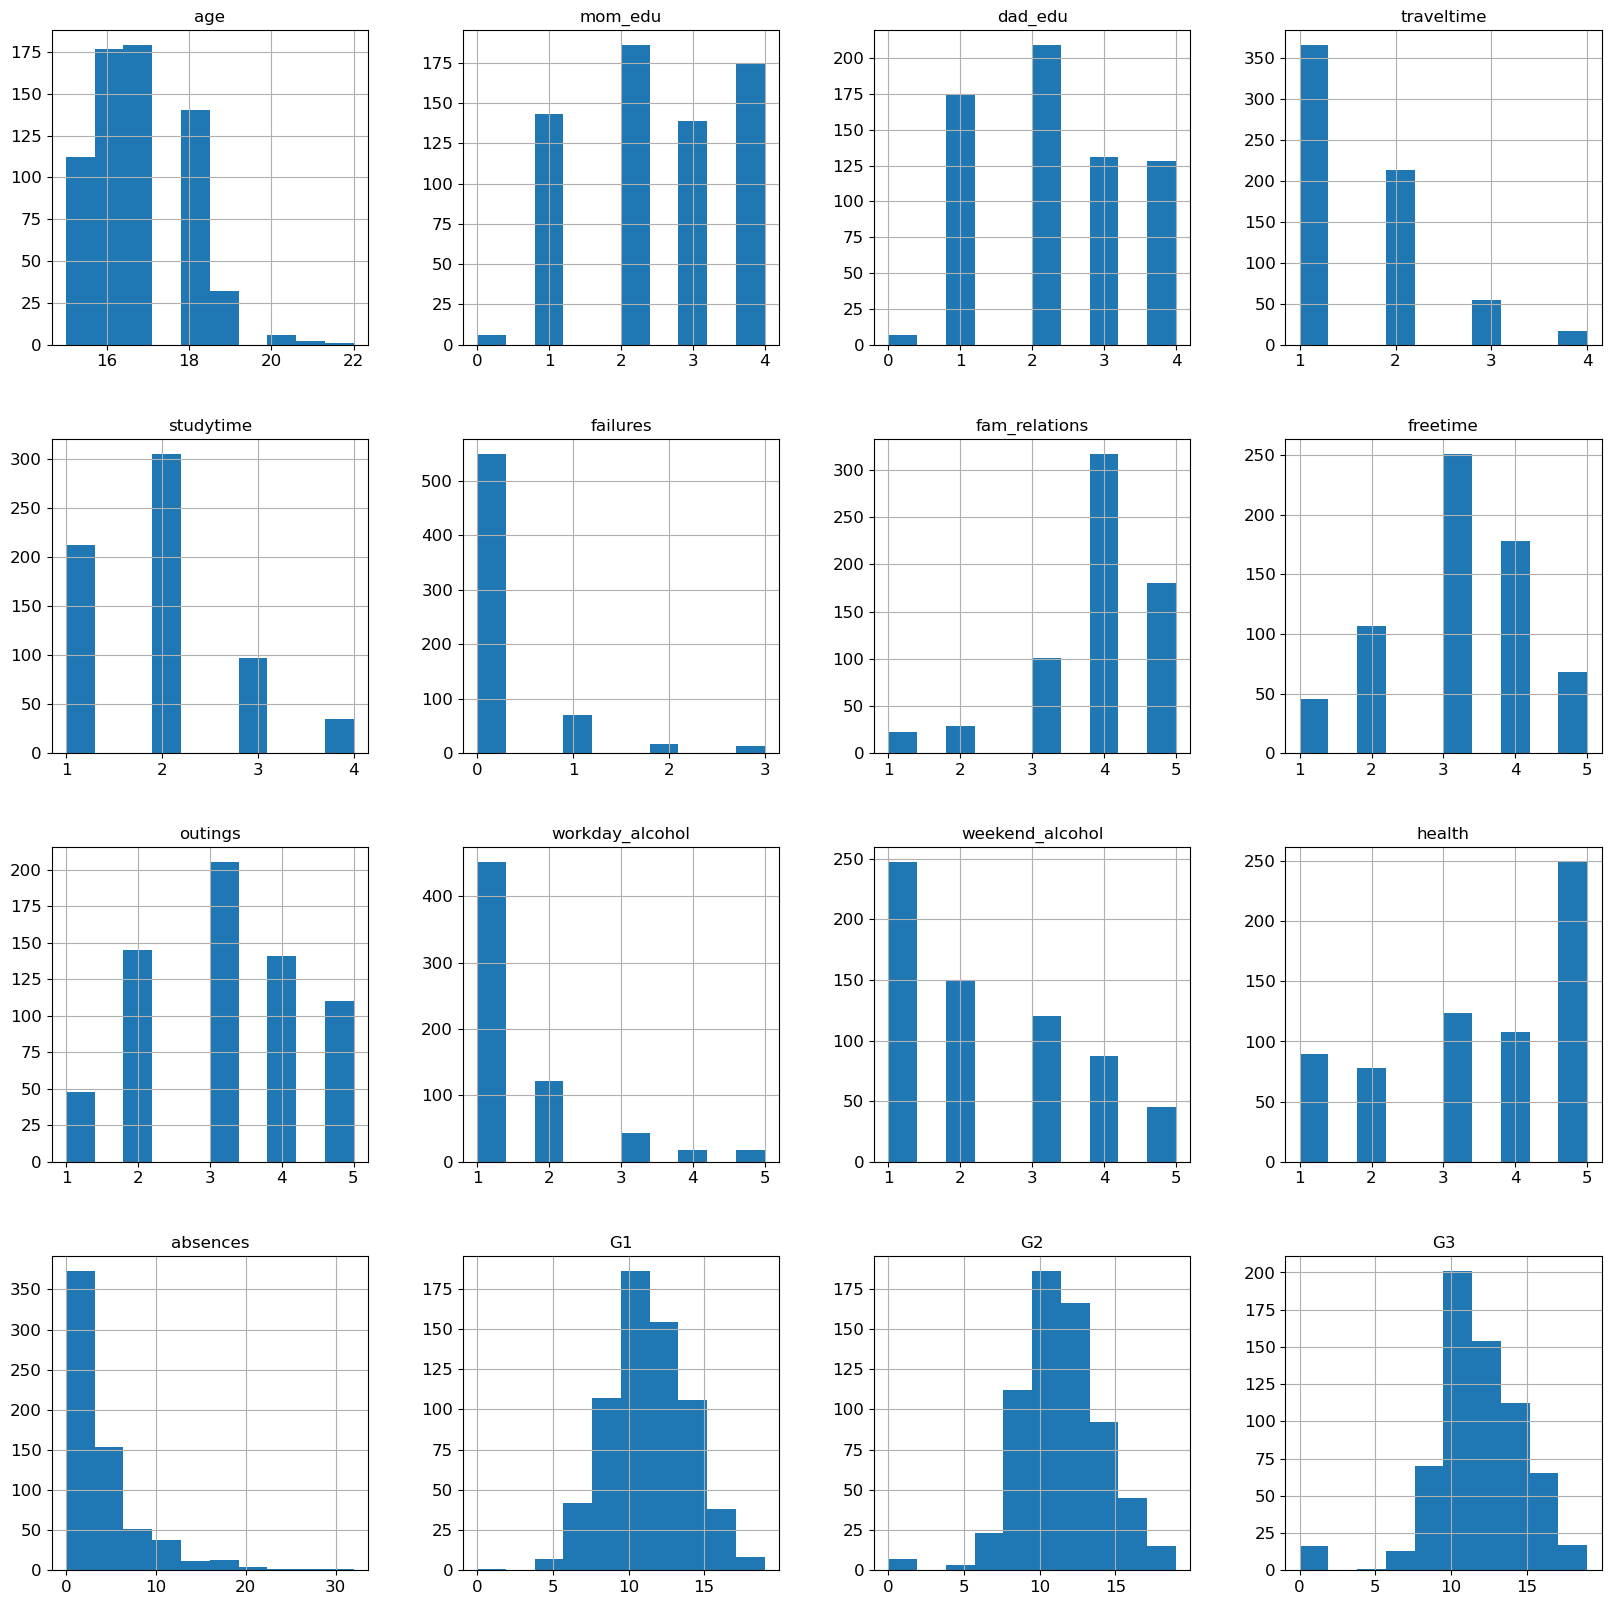

In [12]:
# To plot a histogram for each numerical attribute, aids in checking for nonsensical extreme values (invalid values) in attributes that were converted from ordinal to numeric.
data.hist(figsize=(20, 20))
plt.show()

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
279     GP   M   22       U      GT3             T        3        1   

      mom_job   dad_job  ... fam_relations freetime  outings  workday_alcohol  \
279  services  services  ...             5        4        5                5   

     weekend_alcohol health absences G1 G2 G3  
279                5      1       12  7  8  5  

[1 rows x 33 columns]


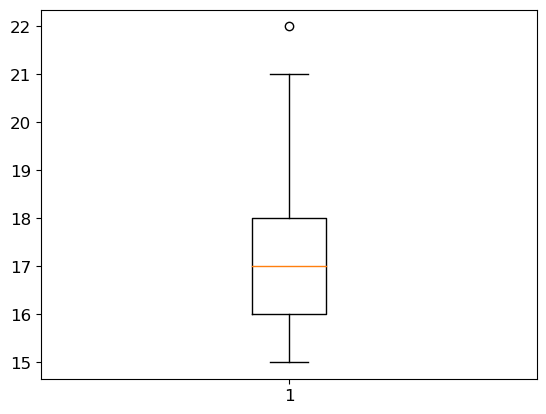

In [13]:
age_Q1 = data["age"].quantile(0.25)
age_Q3 = data["age"].quantile(0.75)
age_IQR = age_Q3 - age_Q1  # Computing IQR

# Data points below the lower fence (Q1-1.5*IQR) and above the upper fence (Q3+1.5*IQR) are considered to be outliers.
age_outliers = data[(data["age"] < (age_Q1 - 1.5 * age_IQR))
                    | (data["age"] > (age_Q3 + 1.5 * age_IQR))]

print(age_outliers)  # to check out the outliers

# # Filtering Values between Q1-1.5IQR and Q3+1.5IQR, removing outliers from the dataset
# data = data[(data["age"]>=(age_Q1 - 1.5 * age_IQR)) & (data["age"]<=(age_Q3 + 1.5 * age_IQR))]
# We do not want the filter the data as we would like to consider the only person of 22 years of age for possible interesting correlations.
# We might want to reconsider our decision at a later point if required.

# Creating boxplot, dots representing data above the upper fence or below the lower fence represent outliers
age_plot = plt.boxplot(data["age"])
plt.show(age_plot)

In [14]:
# Data points above mean + 3*std and below mean + 3*std are considered outliers
upper_G1 = data["G1"].mean() + 3 * data["G1"].std()
lower_G1 = data["G1"].mean() - 3 * data["G1"].std()
print(upper_G1)
print(lower_G1)
data_1 = data[(data["G1"] < upper_G1) & (data["G1"] > lower_G1)]
print(data_1.shape)

upper_G2 = data_1["G2"].mean() + 3 * data_1["G2"].std()
lower_G2 = data_1["G2"].mean() - 3 * data_1["G2"].std()
print(upper_G2)
print(lower_G2)
data_2 = data_1[(data_1["G2"] < upper_G2) & (data_1["G2"] > lower_G2)]
print(data_2.shape)

# Using z-scores to find outliers, all data points with z-score above 3 and below -3 are said to be outliers
data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()
print(data_2[data_2["zscore"] > 3].shape)
# 9 values so they have been removed
print(data_2[data_2["zscore"] < -3].shape)

# new dataframe with no outliers
data_3 = data_2[(data_2['zscore'] > -3) & (data_2['zscore'] < 3)]

19.63487088610952
3.1632801154313093
(648, 33)
20.318397172480005
2.8235781361619683
(641, 33)
(0, 34)
(9, 34)


C:\Users\HP\AppData\Local\Temp\ipykernel_15704\3805946291.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()


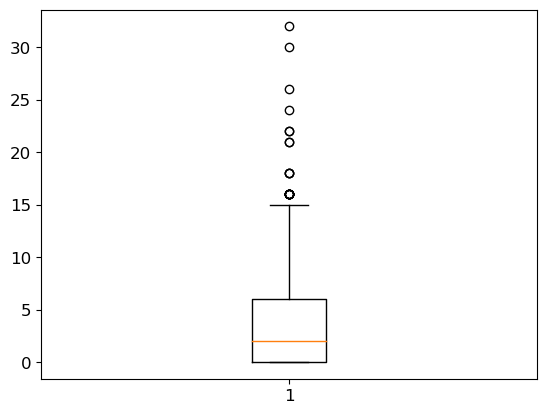

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
40      GP   F   16       U      LE3             T        2        2   
103     GP   F   15       U      GT3             T        3        2   
150     GP   F   15       U      GT3             A        3        3   
155     GP   M   17       U      GT3             T        2        1   
161     GP   M   16       U      GT3             T        4        4   
197     GP   F   17       U      LE3             T        3        3   
206     GP   M   17       U      GT3             T        1        2   
211     GP   M   16       R      LE3             T        3        3   
212     GP   F   17       U      GT3             T        4        4   
217     GP   F   17       R      GT3             T        2        2   
230     GP   F   17       U      GT3             T        4        3   
253     GP   F   18       U      LE3             A        2        4   
254     GP   F   18       U      LE3             T        2     

In [15]:
# Creating boxplots to check for outliers visually, dots representing data above the upper fence or below the lower fence represent outliers as explained already
absences_plot = plt.boxplot(data_3["absences"])
plt.show()

absences_Q1 = data_3["absences"].quantile(0.25)
absences_Q3 = data_3["absences"].quantile(0.75)
absences_IQR = absences_Q3 - absences_Q1  # Computing IQR

absences_outliers = data_3[(data_3["absences"] <
                           (absences_Q1 - 1.5 * absences_IQR))
                          | (data_3["absences"] >
                             (absences_Q3 + 1.5 * absences_IQR))]

print(absences_outliers)  # to check out the outliers

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR, making another dataset without outliers, to resuse outliers data in analysis if required
data4 = data_3[(data_3["absences"] >= (absences_Q1 - 1.5 * absences_IQR))
               & (data_3["absences"] <= (absences_Q3 + 1.5 * absences_IQR))]

In [16]:
print("For studytime")
# counts the occurences of values of each unique value in the column 'studytime'
print(data4['studytime'].value_counts())
# counts the occurences of each unique value in the column 'studytime'
print(data4['studytime'].value_counts().count())

print("For freetime")
# counts the occurences of values of each unique value in the column 'freetime'
print(data4['freetime'].value_counts())
# counts the occurences of each unique value in the column 'freetime'
print(data4['freetime'].value_counts().count())

print("\nFor failures-")
# counts the occurences of values of each unique value in the column 'failures'
print(data4['failures'].value_counts())
# counts the occurences of each unique value in the column 'failures'
print(data4['failures'].value_counts().count())

For studytime
2    284
1    195
3     97
4     35
Name: studytime, dtype: int64
4
For freetime
3    233
4    170
2    102
5     61
1     45
Name: freetime, dtype: int64
5

For failures-
0    527
1     57
2     14
3     13
Name: failures, dtype: int64
4


In [17]:
# counts the occurences of values of each unique value in the column 'health'
print(data4['health'].value_counts())

# counts the occurences of values of each unique value in the column 'parent_status'- "T" - living together or "A" - apart
print(data4['parent_status'].value_counts())

5    234
3    115
4    104
1     85
2     73
Name: health, dtype: int64
T    540
A     71
Name: parent_status, dtype: int64


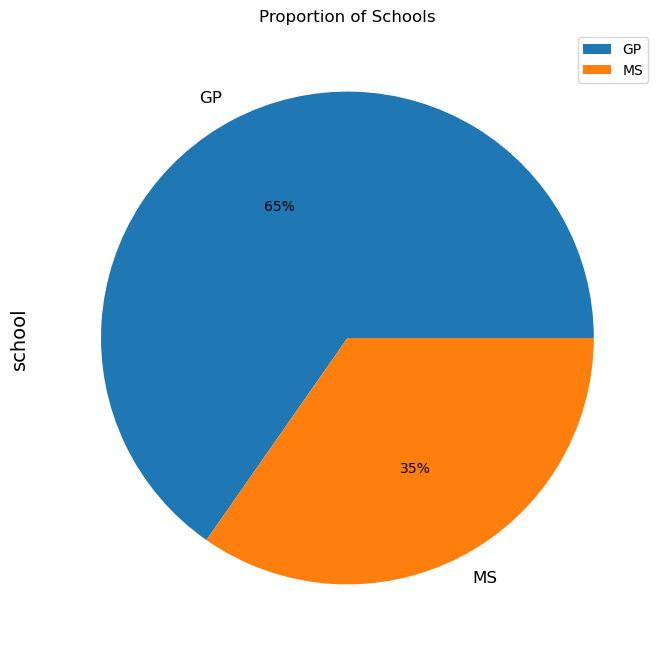

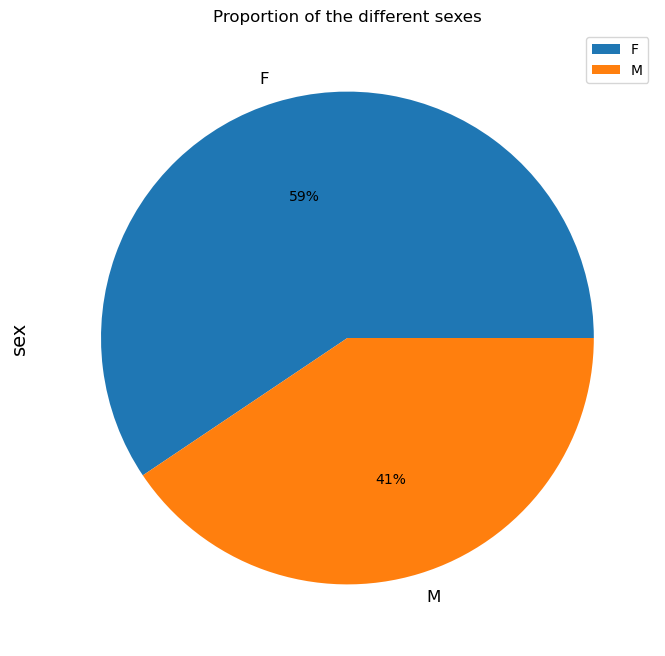

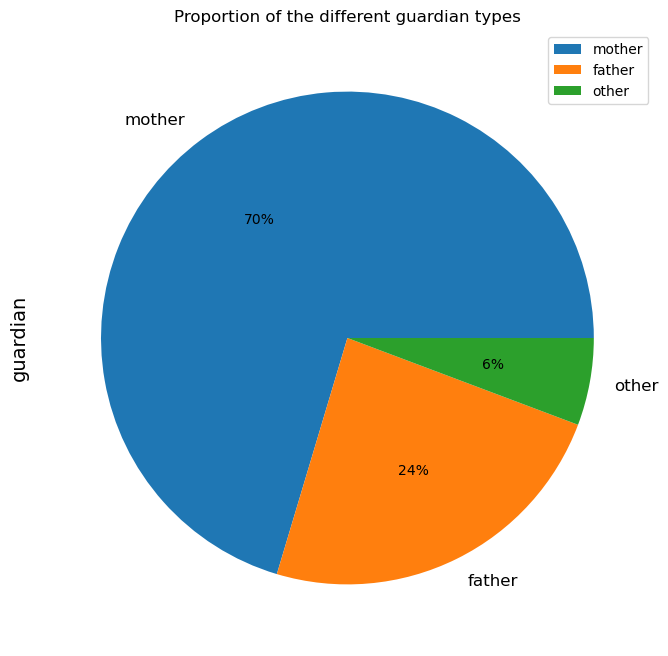

In [18]:
# Shows the proportion of schools mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10, 8))
data4.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of Schools')
plt.legend()

# Shows the proportion of sexes mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.sex.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different sexes')
plt.legend()

# Shows the proportion of guardians types; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.guardian.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different guardian types')
plt.legend()

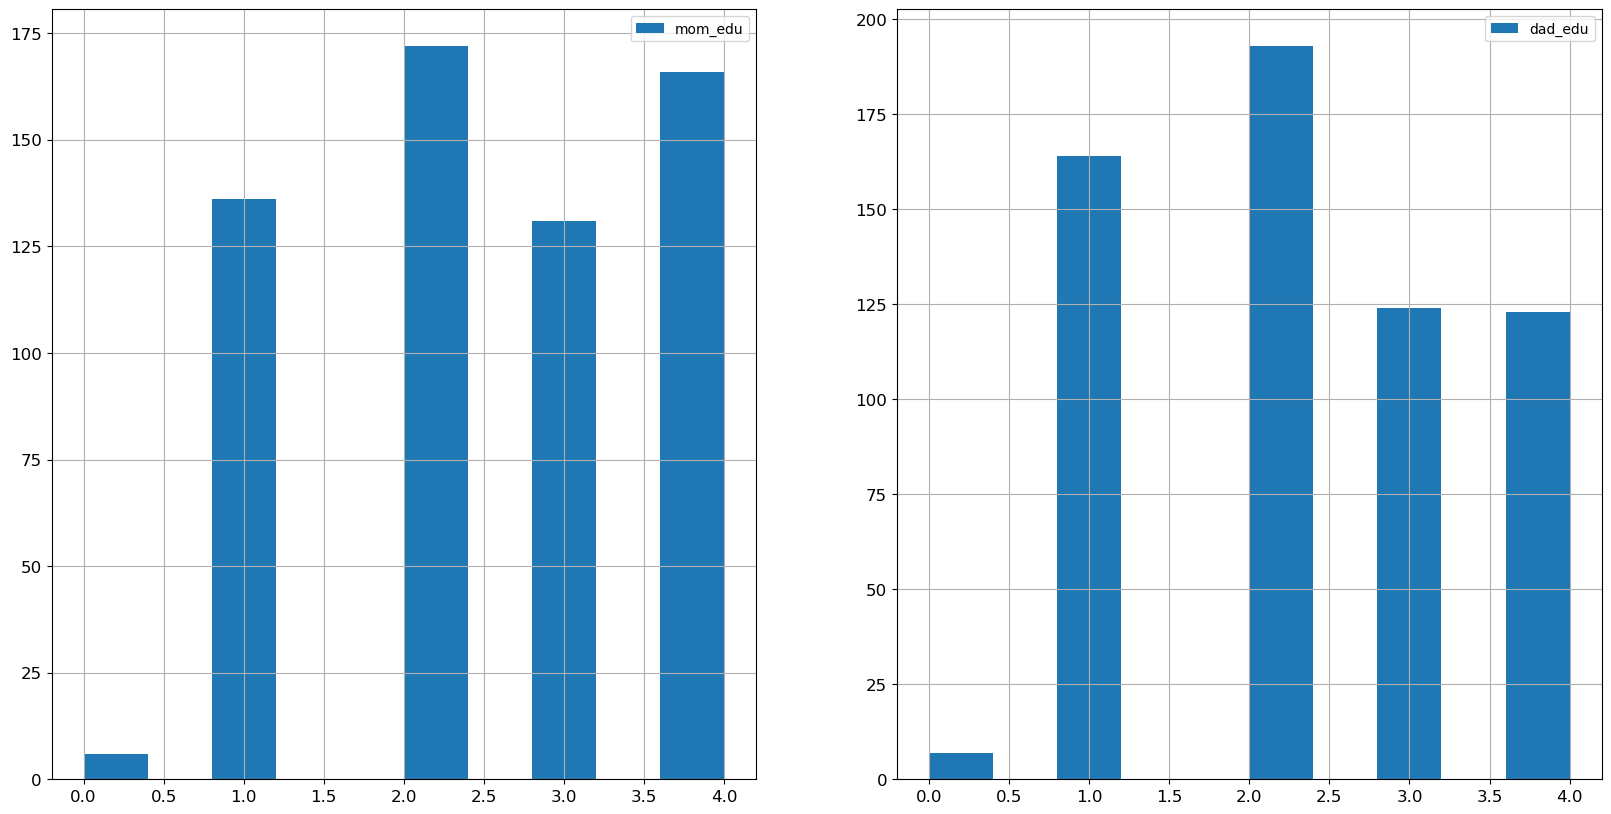

In [19]:
# To plot a histogram for visualizing and comparing mother's and father's education
fig, axes = plt.subplots(1, 2)
data4["mom_edu"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_edu"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

In [20]:
# counts the occurences of values of each unique value in the column 'mom_job'
data4['mom_job'].value_counts()
# counts the occurences of values of each unique value in the column 'dad_job'
data4['dad_job'].value_counts()

other       348
services    169
at_home      39
teacher      32
health       23
Name: dad_job, dtype: int64

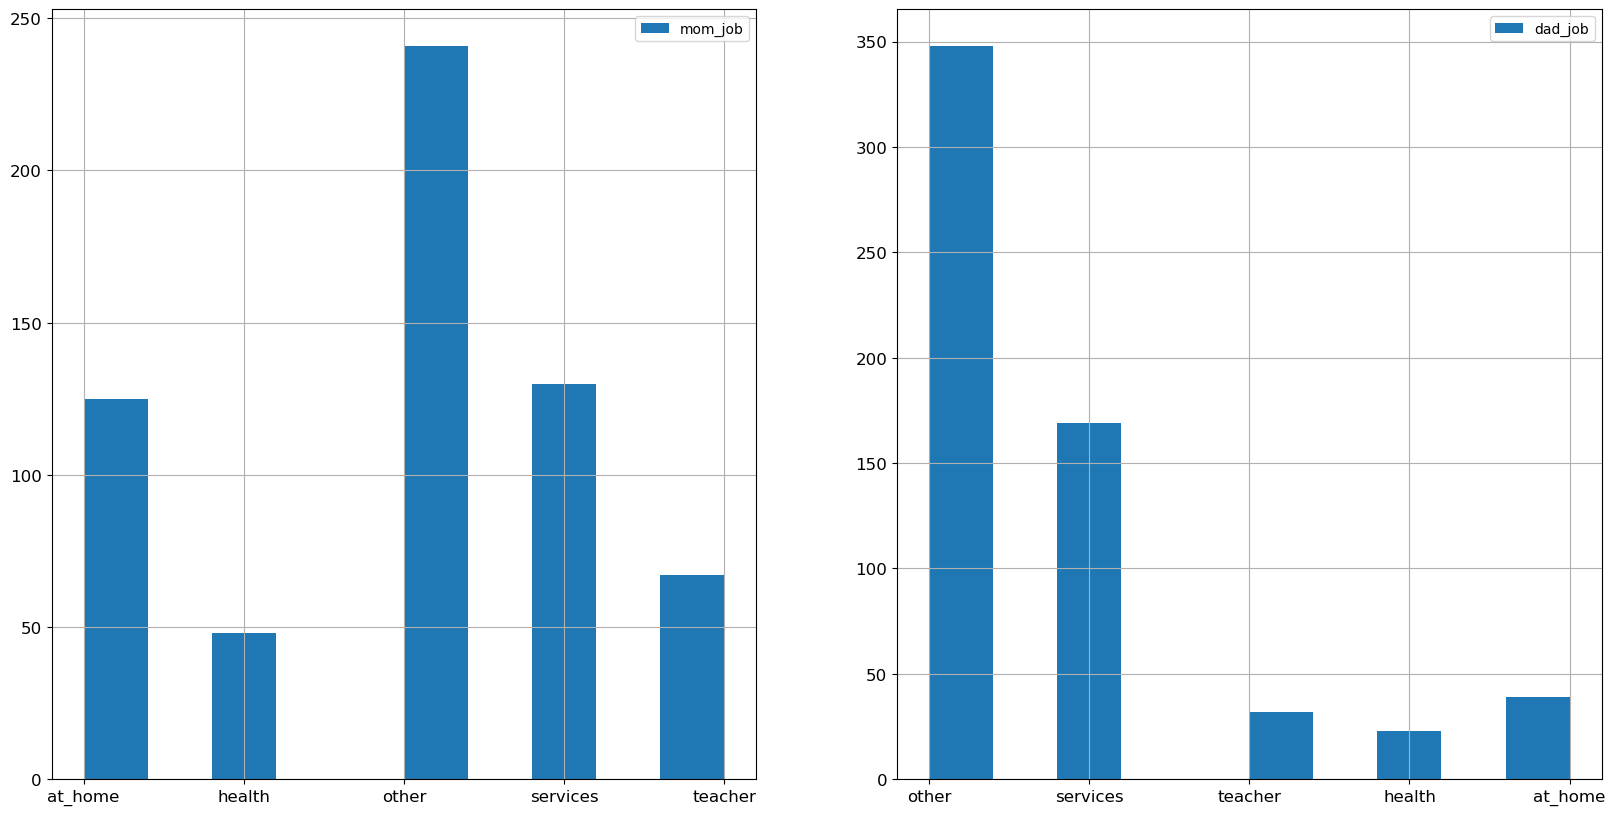

In [21]:
# To visualize the values of the mother's job and father's jobs
fig, axes = plt.subplots(1, 2)
data4["mom_job"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_job"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='address'>

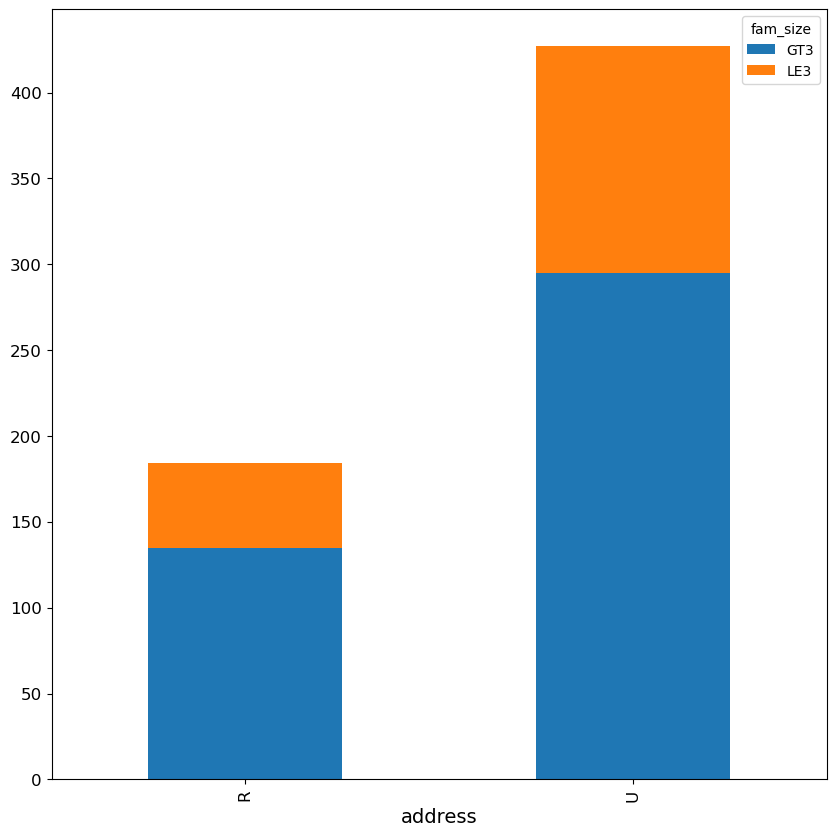

In [22]:
# Reference- https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data
# To visualize the relation between family size and the type of the address (urban(U) or rural(R))
pd.crosstab(data4['address'],data4['fam_size']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='fam_relations'>

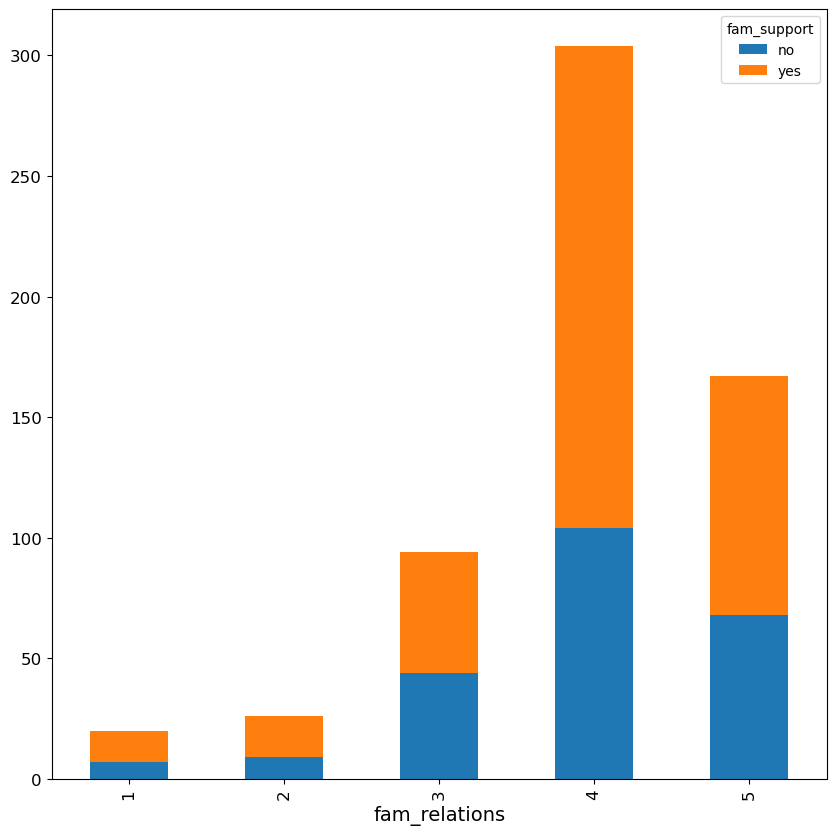

In [23]:
# To visualize the relation between level of family relation and the support from family
pd.crosstab(data4['fam_relations'],data4['fam_support']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='reason'>

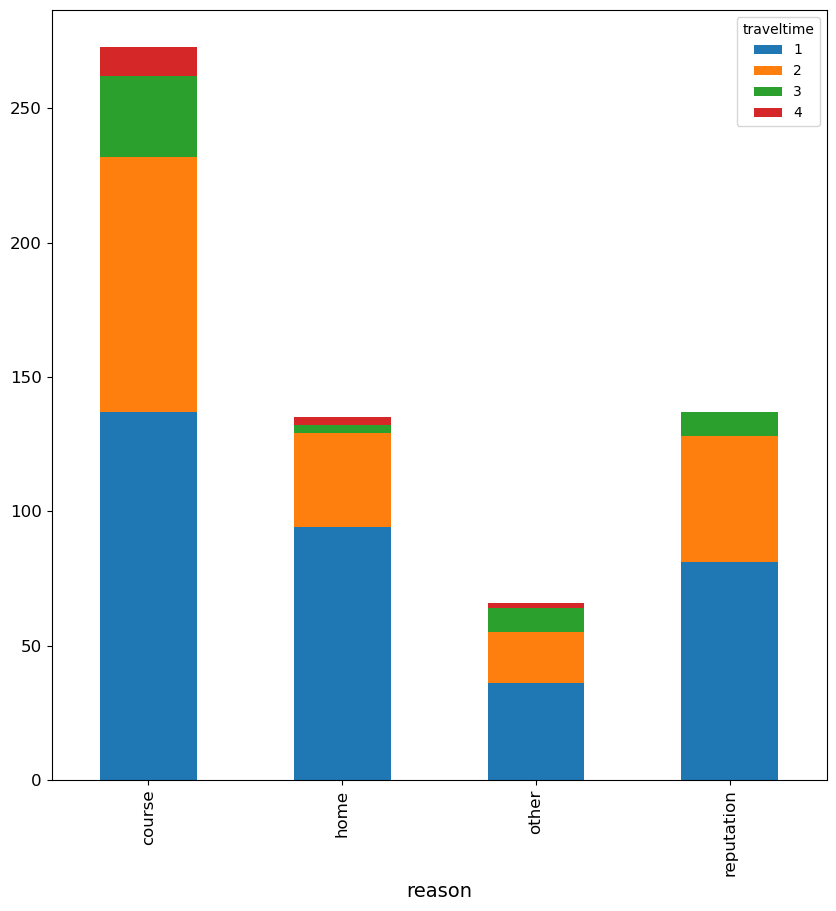

In [24]:
# To outline the relation between the reason for choosing the school v/s the travel time
pd.crosstab(data4['reason'],data4['traveltime']).plot.bar(stacked=True, figsize=(10,10))

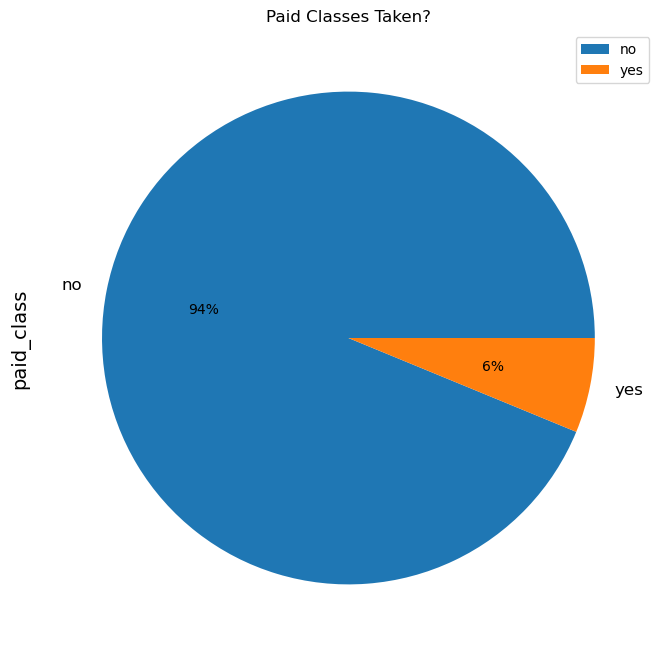

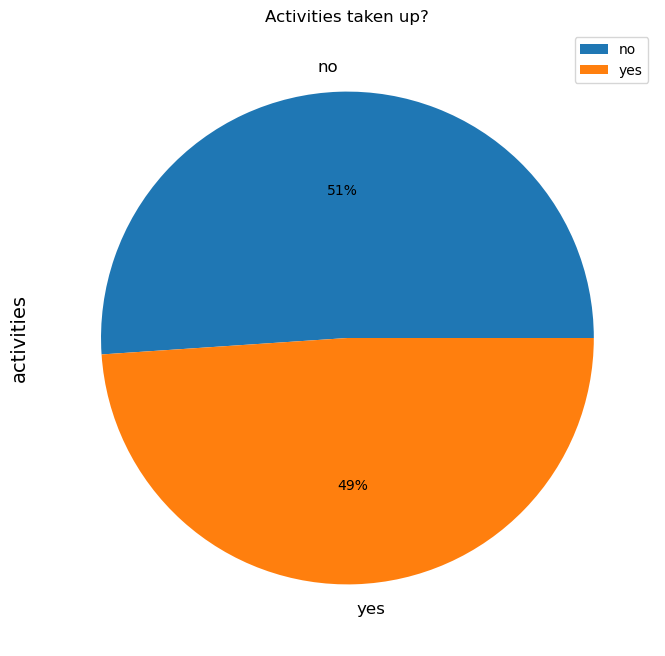

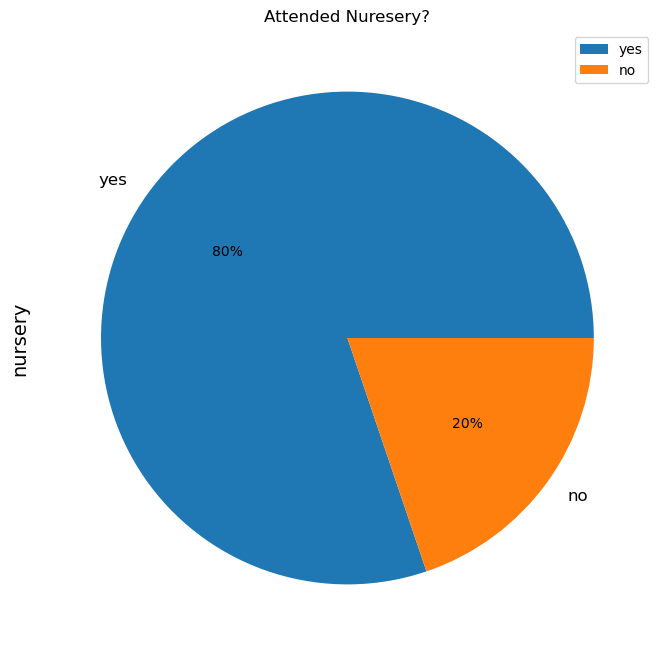

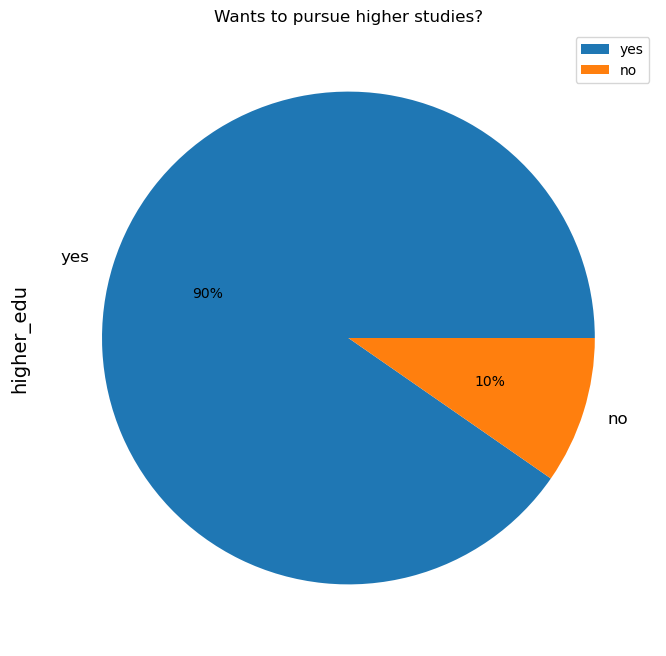

In [25]:
# To have pie charts with some attributes taking binary values
# paid classes for Math or Portuguese
plt.figure(figsize=(10, 8))
data4.paid_class.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Paid Classes Taken?')
plt.legend()

# takes part in other activities 
plt.figure(figsize=(10, 8))
data4.activities.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Activities taken up?')
plt.legend()

# attended nursery school (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.nursery.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Attended Nuresery?')
plt.legend()

# higher - wants to take higher education (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.higher_edu.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wants to pursue higher studies?')
plt.legend()


In [26]:
# counts the occurences of values of each unique value in the column 'internet'- has access to or not
print(data4['internet'].value_counts())

# counts the occurences of values of each unique value in the column 'romantic_relations'- if they are in a romantic relationship or not
print(data4['romantic_relations'].value_counts())

# counts the occurences of values of each unique value in the column 'outings'- frequency of going out with friends
print(data4['outings'].value_counts())

yes    469
no     142
Name: internet, dtype: int64
no     392
yes    219
Name: romantic_relations, dtype: int64
3    196
2    140
4    133
5    100
1     42
Name: outings, dtype: int64


<AxesSubplot:xlabel='weekend_alcohol'>

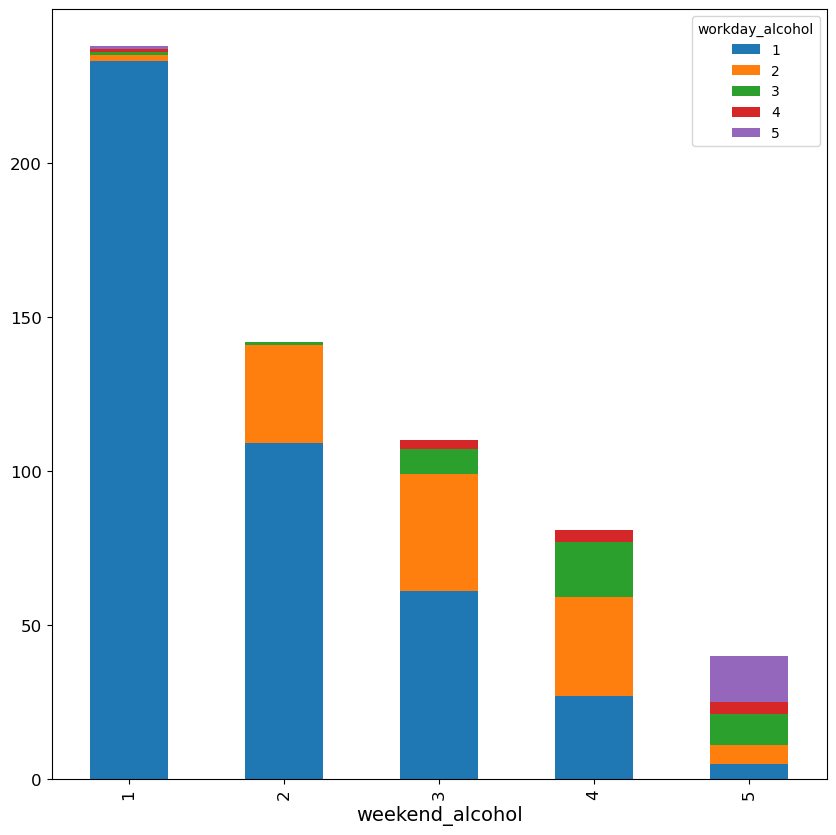

In [27]:
# To showcase the weekday and weekend alcohol consumption
pd.crosstab(data4['weekend_alcohol'],data4['workday_alcohol']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='absences', ylabel='G3'>

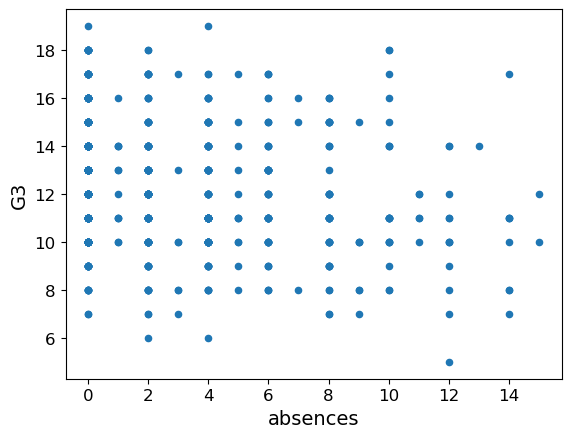

In [28]:
# To find a possible relationship between absences and final grade, before calculating the correlation matrix
data4.plot(kind="scatter", x="absences", y="G3")

## Feature Engineering

In [29]:
data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade
data4.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15704\3837693695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade


school sex  age address fam_size parent_status  mom_edu  dad_edu   mom_job  \
1     GP   F   17       U      GT3             T        1        1   at_home   
2     GP   F   15       U      LE3             T        1        1   at_home   
3     GP   F   15       U      GT3             T        4        2    health   
4     GP   F   16       U      GT3             T        3        3     other   
5     GP   M   16       U      LE3             T        4        3  services   

    dad_job  ... outings workday_alcohol  weekend_alcohol  health  absences  \
1     other  ...       3               1                1       3         2   
2     other  ...       2               2                3       3         6   
3  services  ...       2               1                1       5         0   
4     other  ...       2               1                2       5         0   
5     other  ...       2               1                2       5         6   

   G1  G2  G3    zscore  avg_grade  
1   9  11  11 -0.345841  10.333333  
2  12  13  12 -0.012481  12.333333  
3  14  14  14  0.654237  14.000000  
4  11  13  13  0.320878  12.333333  
5  12  12  13  0.320878  12.333333  

[5 rows x 35 columns]

In [30]:
data4.sort_values(by=['avg_grade'])
bin_labels_5 = ['E', 'D', 'C', 'B', 'A']
data4['final_grade'] = pd.cut(x = data4['avg_grade'],
                              bins=[0, 11, 13, 15, 17, 20],
                              labels=bin_labels_5)
data4.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15704\2023745238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['final_grade'] = pd.cut(x = data4['avg_grade'],


school sex  age address fam_size parent_status  mom_edu  dad_edu   mom_job  \
1     GP   F   17       U      GT3             T        1        1   at_home   
2     GP   F   15       U      LE3             T        1        1   at_home   
3     GP   F   15       U      GT3             T        4        2    health   
4     GP   F   16       U      GT3             T        3        3     other   
5     GP   M   16       U      LE3             T        4        3  services   

    dad_job  ... workday_alcohol weekend_alcohol  health  absences  G1  G2  \
1     other  ...               1               1       3         2   9  11   
2     other  ...               2               3       3         6  12  13   
3  services  ...               1               1       5         0  14  14   
4     other  ...               1               2       5         0  11  13   
5     other  ...               1               2       5         6  12  12   

   G3    zscore  avg_grade final_grade  
1  11 -0.345841  10.333333           E  
2  12 -0.012481  12.333333           D  
3  14  0.654237  14.000000           C  
4  13  0.320878  12.333333           D  
5  13  0.320878  12.333333           D  

[5 rows x 36 columns]

## Correlations

In [31]:
data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations

C:\Users\HP\AppData\Local\Temp\ipykernel_15704\1468635189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations


In [32]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# df = data4.select_dtypes(include=numerics)
# df.columns

# df["parent_edu"] = (df['mom_edu']+df['dad_edu'])/2 # to add an extra attribute
# df["alcohol_consump"] = (df['workday_alcohol']+df['weekend_alcohol'])/2 # to add an extra attribute

In [33]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])

C:\Users\HP\AppData\Local\Temp\ipykernel_15704\3492055340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[columns] = ordinal_encoder.fit_transform(data4[columns])


In [34]:
data4.head()
df = data4.copy()

In [35]:
df.drop(['G1','G2','G3','avg_grade'], axis = 1, inplace = True)
df.head()

school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1     0.0  0.0   17      1.0       0.0            1.0        1        1   
2     0.0  0.0   15      1.0       1.0            1.0        1        1   
3     0.0  0.0   15      1.0       0.0            1.0        4        2   
4     0.0  0.0   16      1.0       0.0            1.0        3        3   
5     0.0  1.0   16      1.0       1.0            1.0        4        3   

   mom_job  dad_job  ...  internet  romantic_relations  fam_relations  \
1      0.0      2.0  ...       1.0                 0.0              5   
2      0.0      2.0  ...       1.0                 0.0              4   
3      1.0      3.0  ...       1.0                 1.0              3   
4      2.0      2.0  ...       0.0                 0.0              4   
5      3.0      2.0  ...       1.0                 0.0              5   

   freetime  outings  workday_alcohol  weekend_alcohol  health  absences  \
1         3        3                1                1       3         2   
2         3        2                2                3       3         6   
3         2        2                1                1       5         0   
4         3        2                1                2       5         0   
5         4        2                1                2       5         6   

   final_grade  
1            E  
2            D  
3            C  
4            D  
5            D  

[5 rows x 31 columns]

In [53]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


In [54]:
df.index = data4.index
df['final_grade'] = data4['final_grade']
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15704\240250418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_grade'] = data4['final_grade']


school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1     0.0  0.0   17      1.0       0.0            1.0        1        1   
2     0.0  0.0   15      1.0       1.0            1.0        1        1   
3     0.0  0.0   15      1.0       0.0            1.0        4        2   
4     0.0  0.0   16      1.0       0.0            1.0        3        3   
5     0.0  1.0   16      1.0       1.0            1.0        4        3   

   mom_job  dad_job  ...  outings  workday_alcohol  weekend_alcohol  health  \
1      0.0      2.0  ...        3                1                1       3   
2      0.0      2.0  ...        2                2                3       3   
3      1.0      3.0  ...        2                1                1       5   
4      2.0      2.0  ...        2                1                2       5   
5      3.0      2.0  ...        2                1                2       5   

   absences  G1  G2  G3  avg_grade  final_grade  
1         2   9  11  11  10.333333            E  
2         6  12  13  12  12.333333            D  
3         0  14  14  14  14.000000            C  
4         0  11  13  13  12.333333            D  
5         6  12  12  13  12.333333            D  

[5 rows x 35 columns]

In [55]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['A'],1)
df1['final_grade'] = df1['final_grade'].replace(['B', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
G2                    0.410737
avg_grade             0.407046
G1                    0.394876
G3                    0.377229
studytime             0.110850
mom_edu               0.101036
age                   0.068041
reason                0.062210
higher_edu            0.058570
address               0.055941
dad_job               0.053935
mom_job               0.038361
parent_status         0.035538
internet              0.031604
fam_size              0.007672
dad_edu               0.000251
health               -0.001506
fam_relations        -0.007877
workday_alcohol      -0.009388
school               -0.011736
weekend_alcohol      -0.013230
fam_support          -0.015263
school_support       -0.031232
outings              -0.035693
activities           -0.043343
freetime             -0.045681
paid_class           -0.046135
traveltime           -0.046965
sex                  -0.052072
failures             -0.062794
guardian             -0.065210
romantic

<AxesSubplot:>

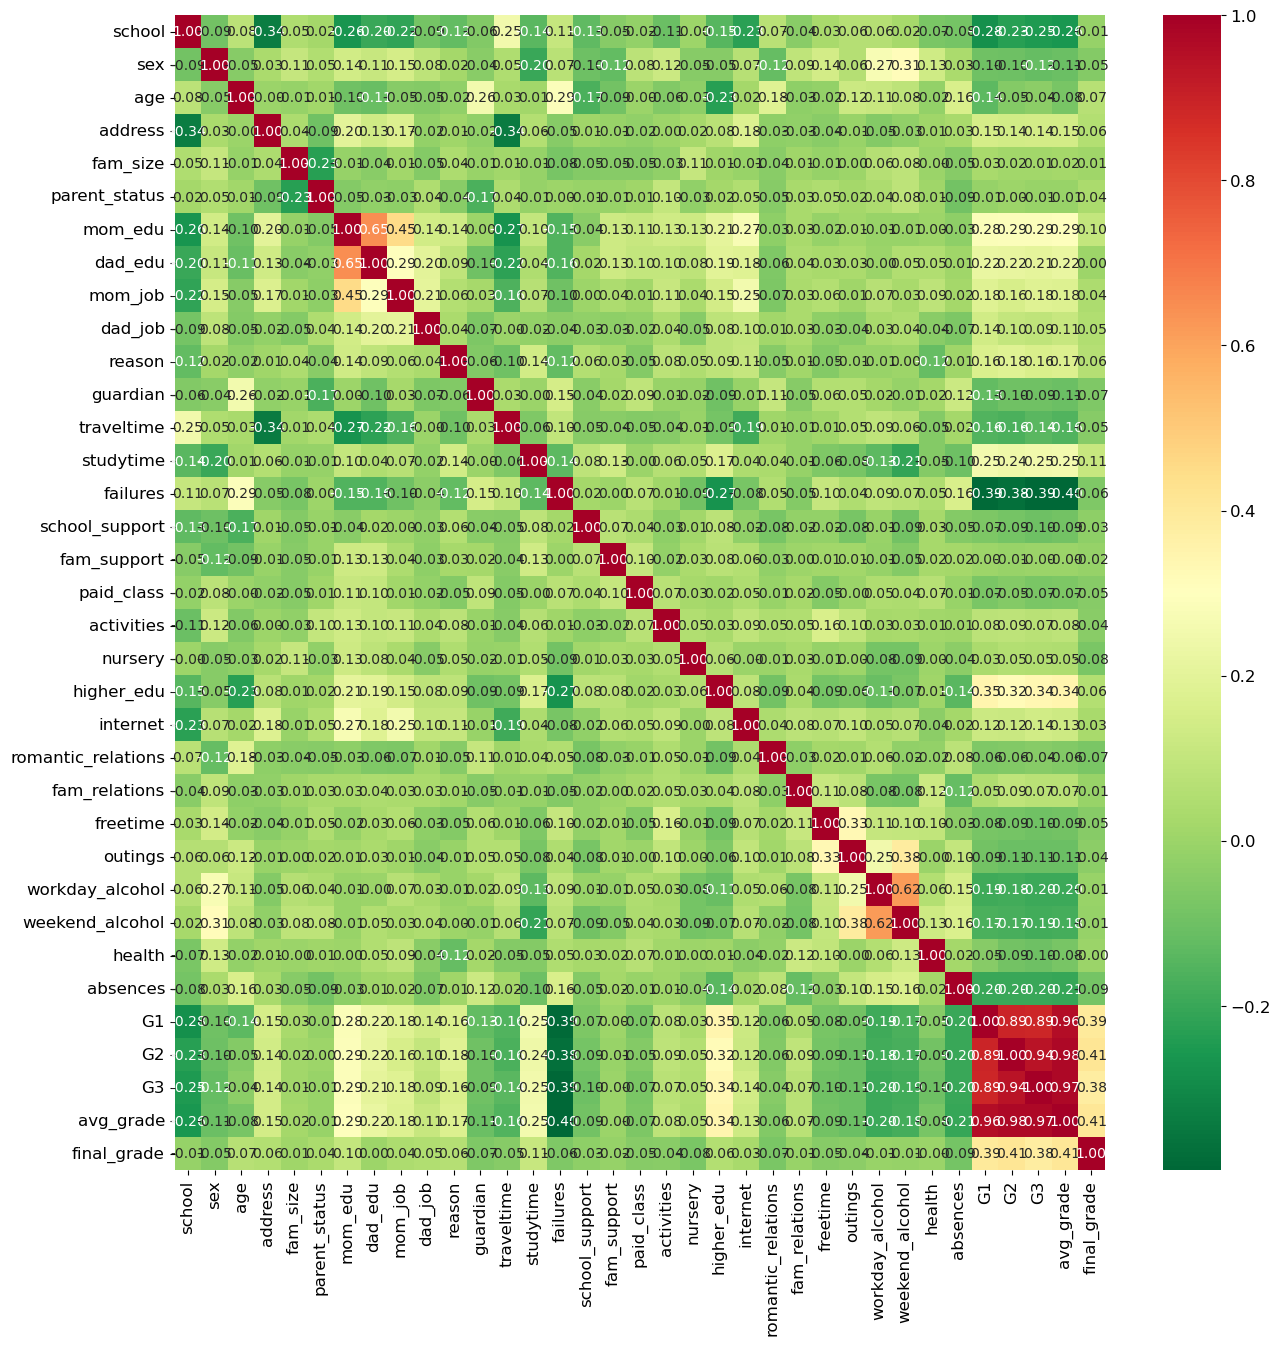

In [56]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [57]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['B'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
G3                    0.496295
avg_grade             0.491252
G2                    0.488831
G1                    0.442449
mom_edu               0.166827
dad_edu               0.138489
studytime             0.113783
higher_edu            0.100757
reason                0.092992
fam_relations         0.076416
dad_job               0.071685
nursery               0.065601
mom_job               0.065254
activities            0.047273
age                   0.042847
internet              0.031906
romantic_relations    0.024292
fam_support           0.013472
address               0.012178
fam_size              0.003814
guardian             -0.004211
outings              -0.022341
paid_class           -0.031211
parent_status        -0.033410
sex                  -0.041591
freetime             -0.047826
school               -0.053623
traveltime           -0.061736
health               -0.062528
absences             -0.065018
workday_alcohol      -0.082990
weekend_

<AxesSubplot:>

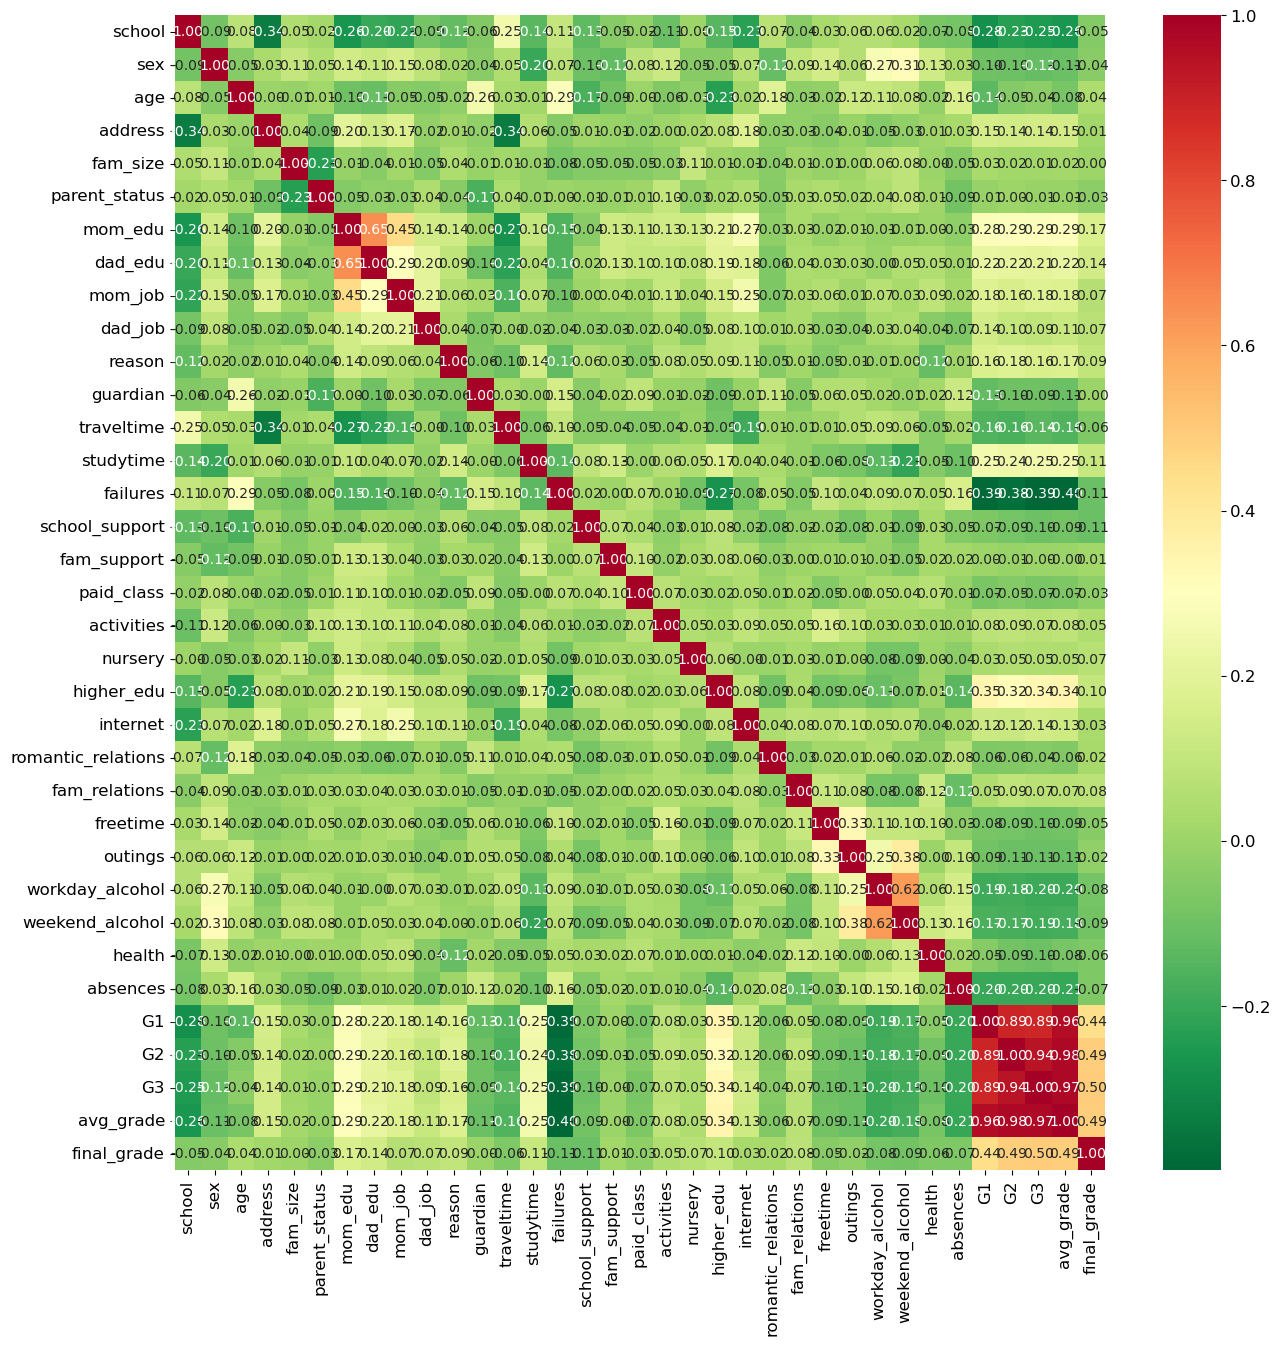

In [58]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [59]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['C'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'B', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
avg_grade             0.398348
G1                    0.389548
G2                    0.385346
G3                    0.382547
higher_edu            0.135150
mom_edu               0.122770
mom_job               0.117867
studytime             0.117668
dad_edu               0.104286
internet              0.098597
nursery               0.097521
address               0.084053
activities            0.070274
reason                0.048184
dad_job               0.030807
freetime              0.014964
fam_relations        -0.001074
fam_size             -0.003796
guardian             -0.006260
romantic_relations   -0.008954
parent_status        -0.009205
outings              -0.033211
fam_support          -0.033408
sex                  -0.053026
paid_class           -0.064293
absences             -0.070028
health               -0.072015
school_support       -0.073968
age                  -0.076271
traveltime           -0.086048
weekend_alcohol      -0.097352
school  

<AxesSubplot:>

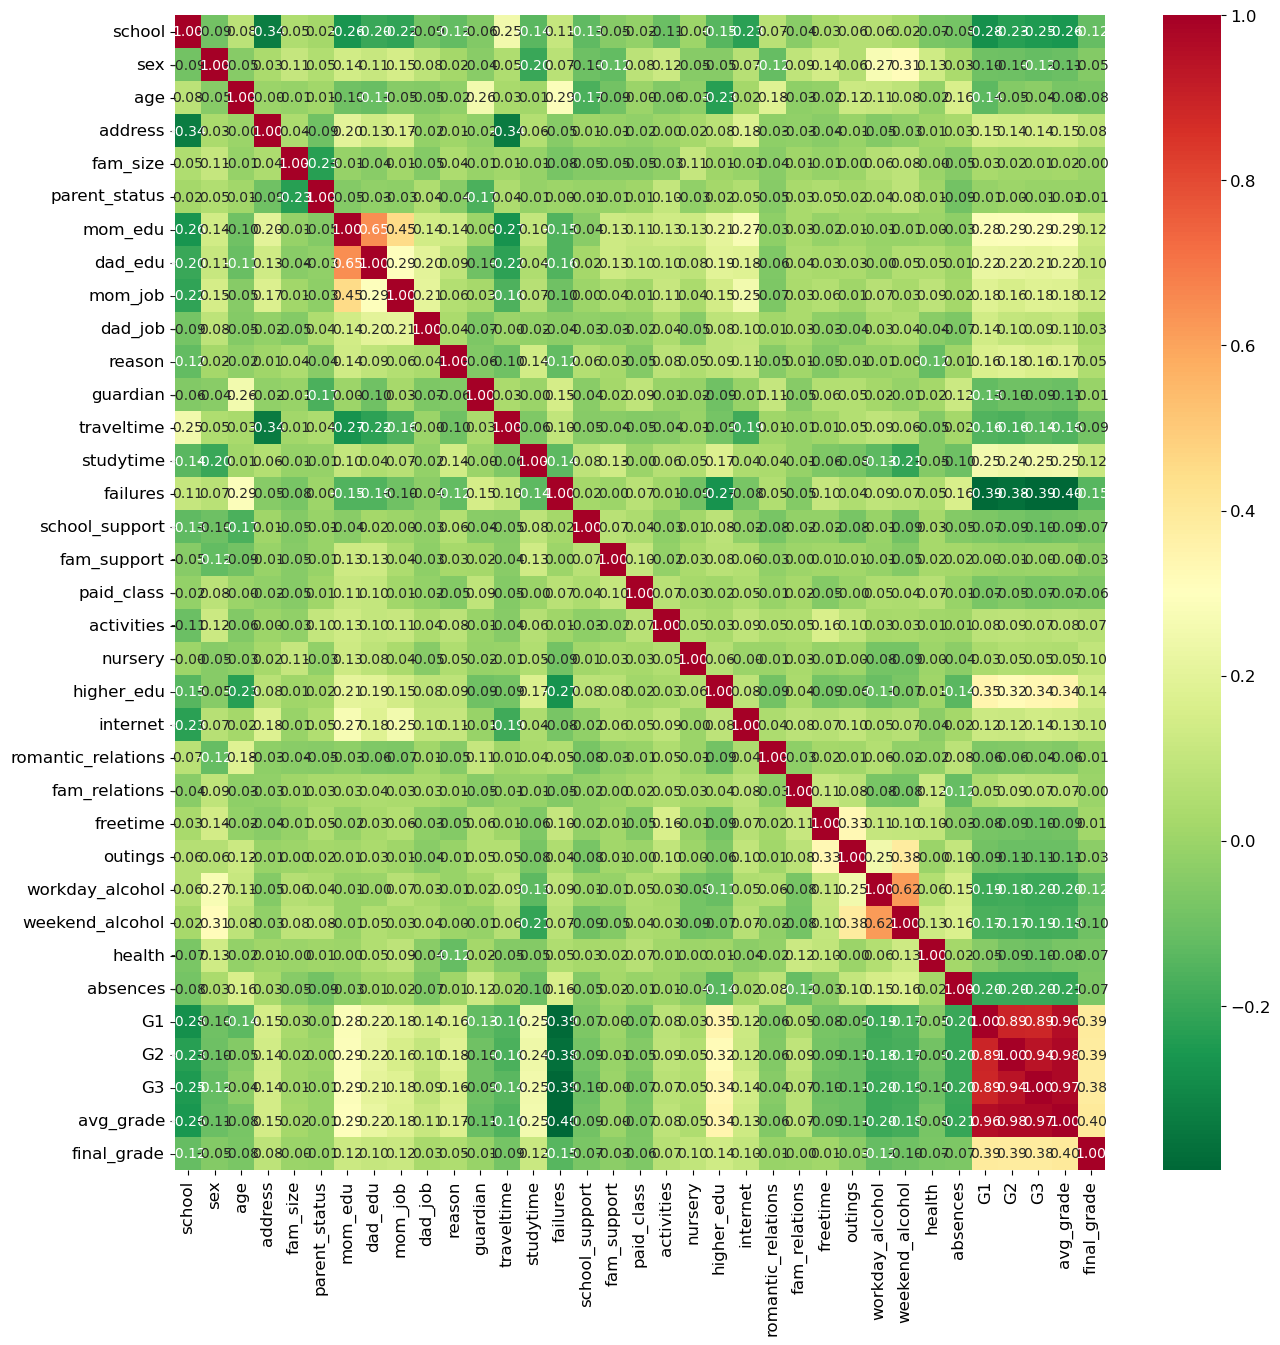

In [60]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [61]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['D'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'B', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.152606
address               0.110810
G1                    0.095495
school_support        0.095187
G3                    0.083558
avg_grade             0.082334
paid_class            0.068015
mom_job               0.063002
G2                    0.060001
fam_support           0.054057
dad_edu               0.049262
fam_relations         0.041886
activities            0.038777
internet              0.037047
mom_edu               0.028502
reason                0.025822
health                0.017724
studytime             0.007603
nursery               0.004298
dad_job               0.002092
fam_size             -0.008525
romantic_relations   -0.019643
parent_status        -0.026964
sex                  -0.034242
weekend_alcohol      -0.039017
outings              -0.044645
workday_alcohol      -0.057510
absences             -0.070543
freetime             -0.075141
traveltime           -0.076119
guardian             -0.080570
age     

<AxesSubplot:>

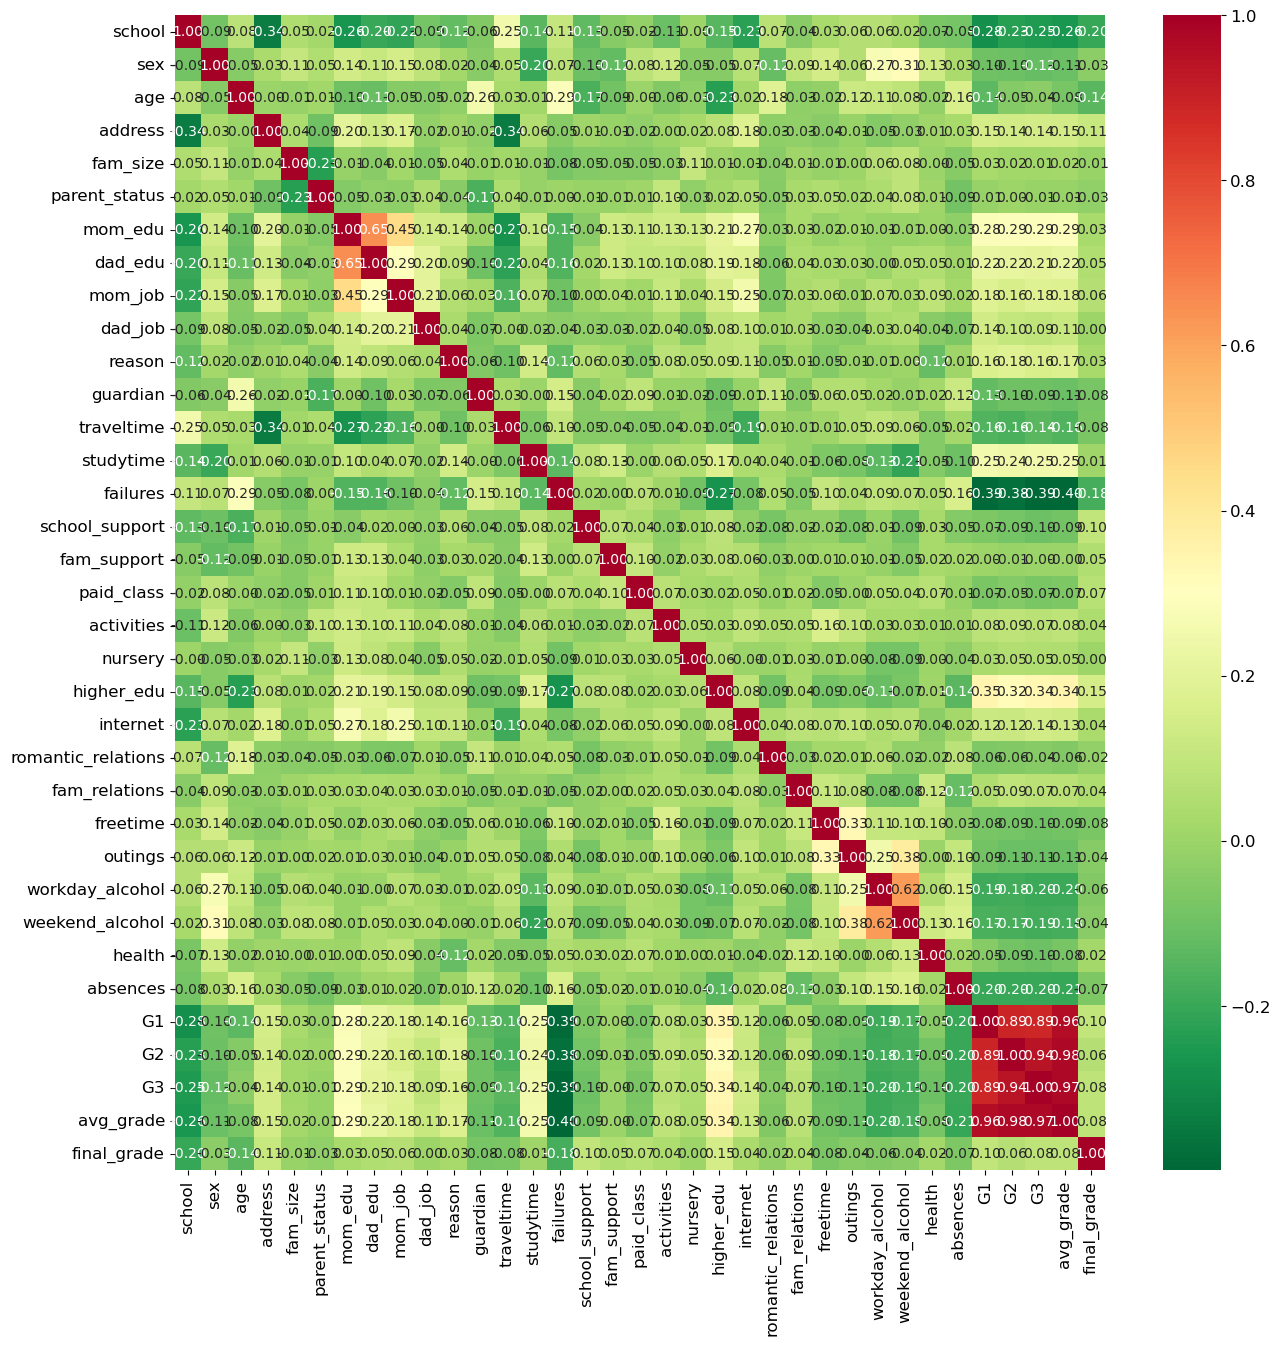

In [62]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [63]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['E'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'B'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
failures              0.356198
school                0.308174
workday_alcohol       0.193000
traveltime            0.186046
absences              0.184628
weekend_alcohol       0.167043
age                   0.134620
sex                   0.113332
guardian              0.102782
freetime              0.099595
outings               0.090902
health                0.075100
school_support        0.041951
parent_status         0.037915
romantic_relations    0.037032
paid_class            0.021629
fam_size              0.005744
fam_support          -0.025582
fam_relations        -0.077661
dad_job              -0.085068
nursery              -0.088862
activities           -0.100407
reason               -0.134786
internet             -0.138026
address              -0.190835
mom_job              -0.197509
studytime            -0.200305
dad_edu              -0.202977
mom_edu              -0.249778
higher_edu           -0.318886
G2                   -0.770418
G1      

<AxesSubplot:>

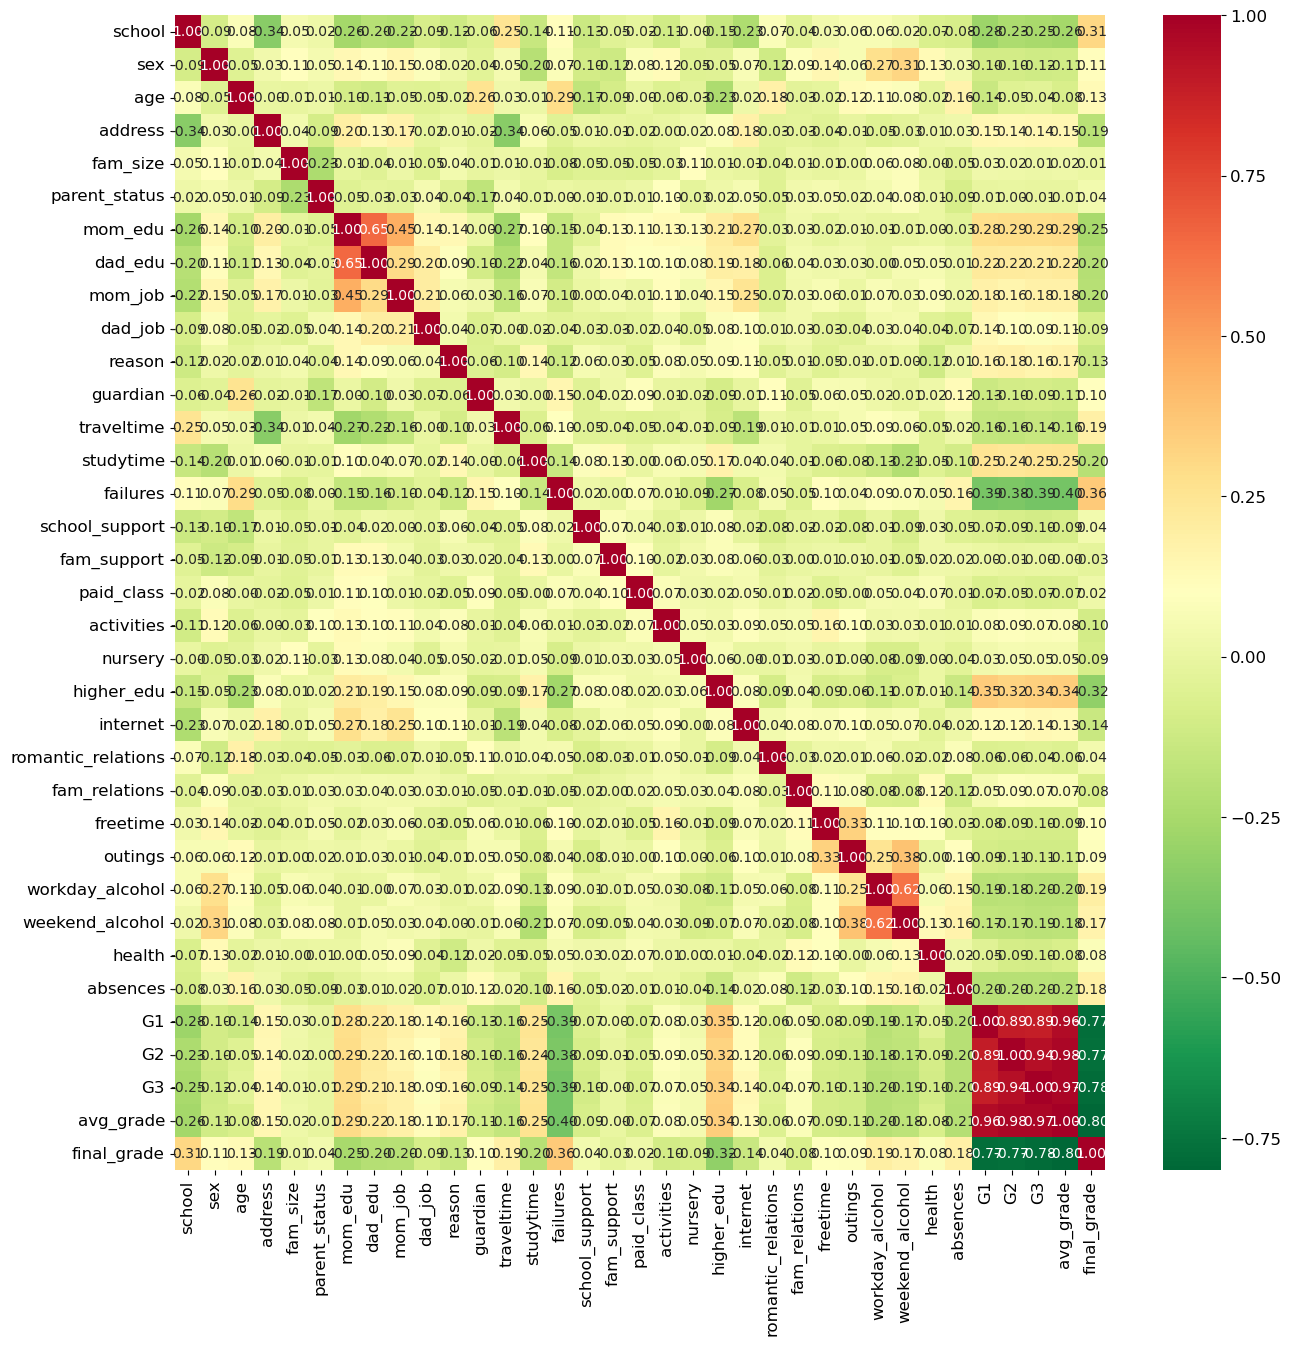

In [64]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [65]:
df_2 = df[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]
df_2.head()

studytime  mom_edu  dad_edu  higher_edu  address  failures  school
1          2        1        1         1.0      1.0         0     0.0
2          2        1        1         1.0      1.0         0     0.0
3          3        4        2         1.0      1.0         0     0.0
4          2        3        3         1.0      1.0         0     0.0
5          2        4        3         1.0      1.0         0     0.0

In [66]:
df_5 = df[['studytime','mom_edu','dad_edu','age','reason','higher_edu','reason','mom_job','school_support','address','failures','paid_class','workday_alcohol','traveltime','absences']]
df_5.head()

studytime  mom_edu  dad_edu  age  reason  higher_edu  reason  mom_job  \
1          2        1        1   17     0.0         1.0     0.0      0.0   
2          2        1        1   15     2.0         1.0     2.0      0.0   
3          3        4        2   15     1.0         1.0     1.0      1.0   
4          2        3        3   16     1.0         1.0     1.0      2.0   
5          2        4        3   16     3.0         1.0     3.0      3.0   

   school_support  address  failures  paid_class  workday_alcohol  traveltime  \
1             0.0      1.0         0         0.0                1           1   
2             1.0      1.0         0         0.0                2           1   
3             0.0      1.0         0         0.0                1           1   
4             0.0      1.0         0         0.0                1           1   
5             0.0      1.0         0         0.0                1           1   

   absences  
1         2  
2         6  
3         0  
4         0  
5         6

In [67]:
# df_10 = df[['final_grade','studytime','mom_edu','age','dad_edu','health','fam_relations','workday_alcohol','weekend_alcohol','outings','freetime','traveltime','absences','failures']]
# df_10.head()
df_10 = df[['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','reason','mom_job','dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]
df_10.head()

studytime  mom_edu  dad_edu  age  sex  guardian  reason  higher_edu  \
1          2        1        1   17  0.0       0.0     0.0         1.0   
2          2        1        1   15  0.0       1.0     2.0         1.0   
3          3        4        2   15  0.0       1.0     1.0         1.0   
4          2        3        3   16  0.0       0.0     1.0         1.0   
5          2        4        3   16  1.0       1.0     3.0         1.0   

   reason  mom_job  ...  nursery  school  school_support  failures  address  \
1     0.0      0.0  ...      0.0     0.0             0.0         0      1.0   
2     2.0      0.0  ...      1.0     0.0             1.0         0      1.0   
3     1.0      1.0  ...      1.0     0.0             0.0         0      1.0   
4     1.0      2.0  ...      1.0     0.0             0.0         0      1.0   
5     3.0      3.0  ...      1.0     0.0             0.0         0      1.0   

   paid_class  workday_alcohol  weekend_alcohol  traveltime  absences  
1         0.0                1                1           1         2  
2         0.0                2                3           1         6  
3         0.0                1                1           1         0  
4         0.0                1                2           1         0  
5         0.0                1                2           1         6  

[5 rows x 23 columns]

## Prepare Data for Classifier

In [222]:
# already did?
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

"""A function that applies transformer pipeline"""

# Use transformer pipline to apply normalization and encode the categorical variables
def transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns):
    transformers = [('numerical', StandardScaler(), numerical_columns), 
                  ('nominal', OneHotEncoder(), nominal_columns),
                  ('binary_ordinal', OrdinalEncoder(), binary_ordinal_columns)]
    transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')
    df = pd.DataFrame(transformer_pipeline.fit_transform(df))
    return df


In [223]:

# 1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)
print(new_df)



#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47])
new_Y = new_df[47]
new_X, new_Y

           0         1    2    3    4    5    6    7    8    9   ... 38 39 40  \
0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  3  3  1   
1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  3  2  2   
2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2  2  1   
3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3  2  1   
4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  2  1   
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  2  1   
607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  3  4  1   
608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1  1  1   
609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  4  5  3   
610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  1  3   

    41 42  43  44  45      

(           0         1    2    3    4    5    6    7    8    9   ... 37 38 39  \
 0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  5  3  3   
 1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3  2  2   
 3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 ..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
 606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  4  3  4   
 608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1  1  1   
 609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  2  4  5   
 610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  4  1   
 
     40 41 42 

In [224]:
from sklearn.model_selection import train_test_split

# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)

In [225]:
# 2. Prepare df2 - dataset with top 2 correlated features
df2 = data4[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]

binary_ordinal_columns = ['school', 'address', 'higher_edu'] 

nominal_columns = []

numerical_columns = []

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)


#encode target class
le = LabelEncoder()
new_df[34] = le.fit_transform(new_df[34]) #final grade column 


#seperate features from target column
X_df2 = new_df.drop(columns=[34])
Y_df2 = new_df[34]
X_df2, Y_df2

(      0    1    2    3   4    5    6  7  8    9   ... 24 25 26 27 28 29  30  \
 0    0.0  1.0  1.0  0.0  17  0.0  1.0  1  1  0.0  ...  3  3  1  1  3  2   9   
 1    0.0  1.0  1.0  0.0  15  1.0  1.0  1  1  0.0  ...  3  2  2  3  3  6  12   
 2    0.0  1.0  1.0  0.0  15  0.0  1.0  4  2  1.0  ...  2  2  1  1  5  0  14   
 3    0.0  1.0  1.0  0.0  16  0.0  1.0  3  3  2.0  ...  3  2  1  2  5  0  11   
 4    0.0  1.0  1.0  1.0  16  1.0  1.0  4  3  3.0  ...  4  2  1  2  5  6  12   
 ..   ...  ...  ...  ...  ..  ...  ... .. ..  ...  ... .. .. .. .. .. ..  ..   
 606  1.0  0.0  1.0  0.0  19  0.0  1.0  2  3  3.0  ...  4  2  1  2  5  4  10   
 607  1.0  1.0  1.0  0.0  18  1.0  1.0  3  1  4.0  ...  3  4  1  1  1  4  15   
 608  1.0  1.0  1.0  0.0  18  0.0  1.0  1  1  2.0  ...  1  1  1  1  5  6  11   
 609  1.0  1.0  1.0  1.0  17  1.0  1.0  3  1  3.0  ...  4  5  3  4  2  6  10   
 610  1.0  0.0  1.0  1.0  18  1.0  1.0  3  2  3.0  ...  4  1  3  4  5  4  10   
 
      31  32         33  
 0    11  11

In [226]:
# create a test - train split for df2
df2_X_train, df2_X_test, df2_Y_train, df2_Y_test = train_test_split(X_df2, Y_df2, test_size=0.25)

In [227]:
# 3. Prepare df5 - data set with top 5 correlated features
df5 = data4[['studytime','mom_edu','dad_edu','age','reason','higher_edu','mom_job','school_support',
             'address','failures','paid_class','workday_alcohol','traveltime','absences']]

binary_ordinal_columns = ['address', 'school_support', 'paid_class', 'higher_edu'] 

nominal_columns = ['mom_job', 'reason',]

numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

#encode target class
le = LabelEncoder()
new_df[41] = le.fit_transform(new_df[41]) #final grade column 


#seperate features from target column
X_df5 = new_df.drop(columns=[41])
Y_df5 = new_df[41]
X_df5, Y_df5

(           0         1    2    3    4    5    6    7    8    9   ... 31 32 33  \
 0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  5  3  3   
 1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  3  2  2   
 3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  4  3  2   
 4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  5  4  2   
 ..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
 606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  5  4  2   
 607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  4  3  4   
 608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1  1  1   
 609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  2  4  5   
 610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  4  4  1   
 
     34 35 36 

In [228]:
# create a test - train split for df5
df5_X_train, df5_X_test, df5_Y_train, df5_Y_test = train_test_split(X_df5, Y_df5, test_size=0.25)

In [229]:
# 4. Use df 10 dataframe with 10 correlated features
df10 = data4 [['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','mom_job',
               'dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]


binary_ordinal_columns = ['school', 'sex', 'address', 'parent_status', 'school_support',
       'paid_class', 'nursery', 'higher_edu', 'internet'] 

nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

#seperate features from target column
X_df10 = new_df.drop(columns=[47])
Y_df10 = new_df[47]
X_df10, Y_df10

(           0         1    2    3    4    5    6    7    8    9   ... 37 38 39  \
 0    0.248695 -0.337771  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  5  3  3   
 1    -1.41199  0.782326  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 2    -1.41199 -0.897819  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3  2  2   
 3   -0.581647 -0.897819  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  4  3  2   
 4   -0.581647  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 ..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..   
 606   1.90938  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  5  4  2   
 607  1.079037  0.222278  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  4  3  4   
 608  1.079037  0.782326  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1  1  1   
 609  0.248695  0.782326  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  2  4  5   
 610  1.079037  0.222278  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  4  4  1   
 
     40 41 42 

In [230]:
# create a test - train split for df10
df10_X_train, df10_X_test, df10_Y_train, df10_Y_test = train_test_split(X_df10, Y_df10, test_size=0.25)

## Train and Test the Classifier

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Create an array of classifiers: Decision Tree, KNearestNeighbours, Random Forest Classifier
models = []

modelA = tree.DecisionTreeClassifier()
models.append(modelA)
modelB = RandomForestClassifier()
models.append(modelB)
modelC = KNeighborsClassifier()
models.append(modelC)

In [232]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)

        print('\n')

    return accuracies  # a list of every models accuracy on the current dataset

##### Generating Evaluation Metrics (Accuracy, Precision, Recall, F1 Scores) and Confusion Matrices

RESULTS FOR DF -- THE ENTIRE DATASET 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 5  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 45  0]
 [ 0  0  0  0 61]]
True positive =  5
False positive =  0
False negative =  0
True negative =  17
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 1.0
Micro Average Precision Score of the classifier RandomForestClassifier() is 1.0
Macro Average Precisi

[Text(0.2857142857142857, 0.9, 'X[46] <= 11.167\ngini = 0.692\nsamples = 458\nvalue = [14, 36, 81, 124, 203]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 203\nvalue = [0, 0, 0, 0, 203]'),
 Text(0.42857142857142855, 0.7, 'X[46] <= 13.167\ngini = 0.64\nsamples = 255\nvalue = [14, 36, 81, 124, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 124\nvalue = [0, 0, 0, 124, 0]'),
 Text(0.5714285714285714, 0.5, 'X[46] <= 15.167\ngini = 0.531\nsamples = 131\nvalue = [14, 36, 81, 0, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 81\nvalue = [0, 0, 81, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[46] <= 17.167\ngini = 0.403\nsamples = 50\nvalue = [14, 36, 0, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0, 0, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0, 0, 0]')]

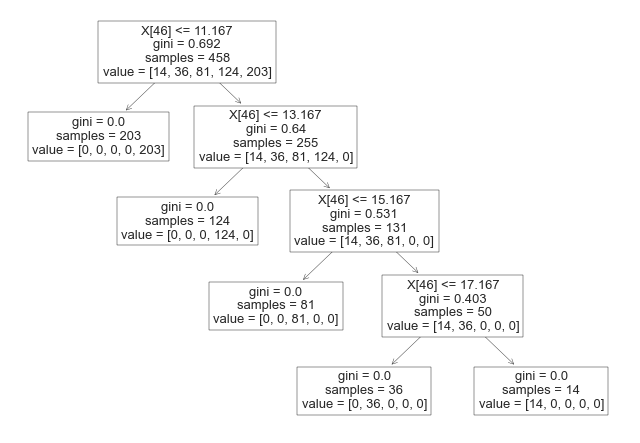

In [233]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

tree.plot_tree(modelA) # plotting the decision tree
# A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

RESULTS FOR DF2 -- TOP2 CORRELATED 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 4  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 48  0]
 [ 0  0  0  0 51]]
True positive =  4
False positive =  0
False negative =  0
True negative =  18
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 0.9803921568627451
Micro Average Precision Score of the classifier RandomForestClassifier() is 0.9803921568

[Text(0.2857142857142857, 0.9, 'X[46] <= 11.167\ngini = 0.703\nsamples = 458\nvalue = [16, 41, 79, 128, 194]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 194\nvalue = [0, 0, 0, 0, 194]'),
 Text(0.42857142857142855, 0.7, 'X[46] <= 13.167\ngini = 0.648\nsamples = 264\nvalue = [16, 41, 79, 128, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 128\nvalue = [0, 0, 0, 128, 0]'),
 Text(0.5714285714285714, 0.5, 'X[46] <= 15.167\ngini = 0.558\nsamples = 136\nvalue = [16, 41, 79, 0, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 79\nvalue = [0, 0, 79, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[46] <= 17.167\ngini = 0.404\nsamples = 57\nvalue = [16, 41, 0, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0, 0, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]')]

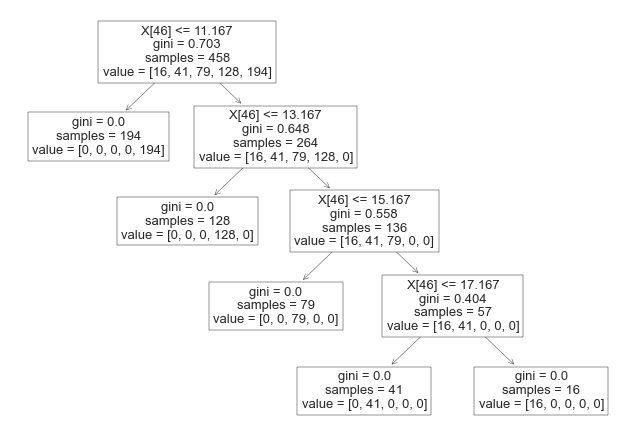

In [234]:
#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)
tree.plot_tree(modelA) # plotting the decision tree

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)
tree.plot_tree(modelA) # plotting the decision tree 

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)
tree.plot_tree(modelA) # plotting the decision tree

##### Generating Evaluation Metrics (Multi-class ROCAUC Curves)

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

    return accuracies  # a list of every models accuracy on the current dataset

RESULTS FOR DF -- THE ENTIRE DATASET 



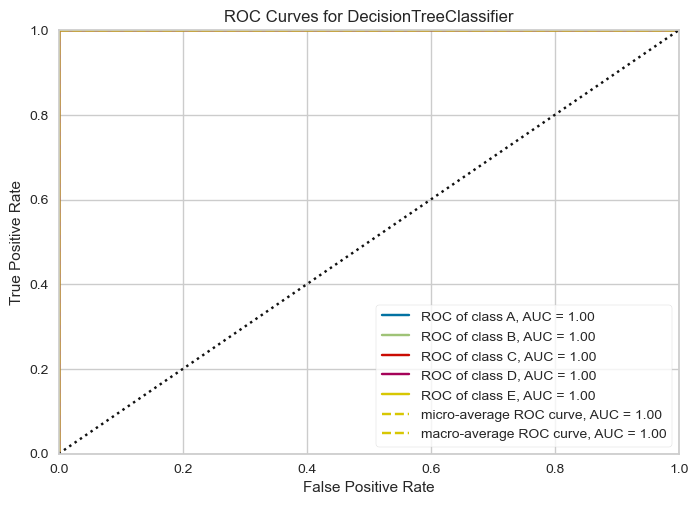

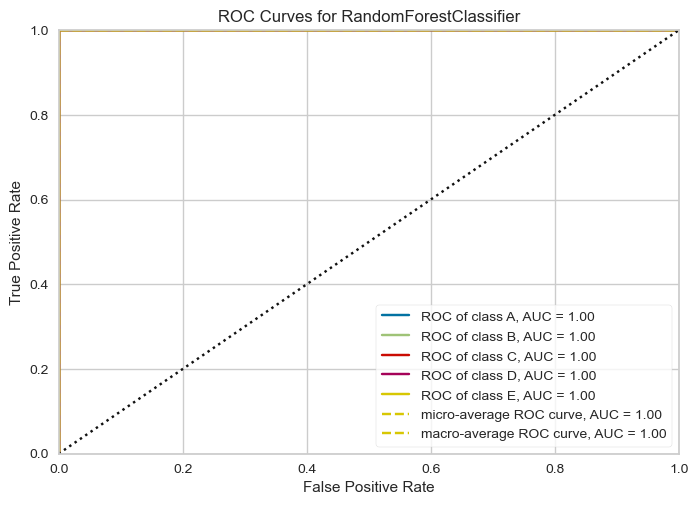

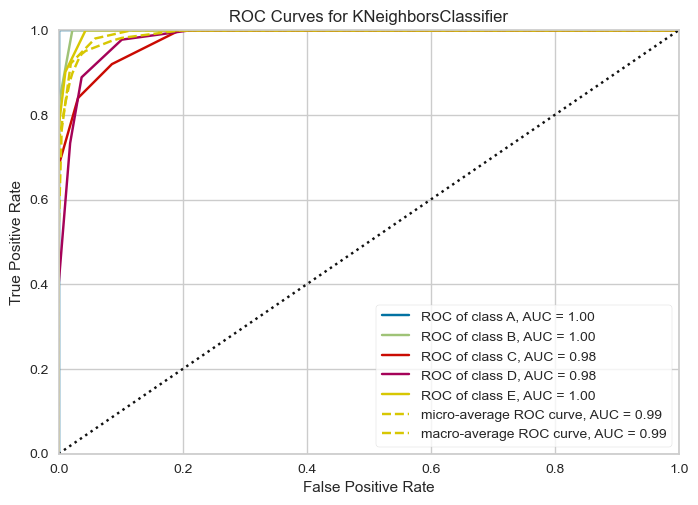

RESULTS FOR DF2 -- TOP2 CORRELATED 



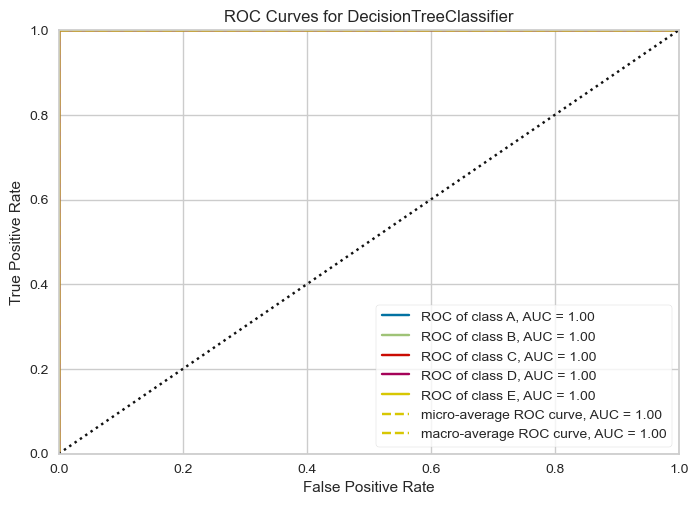

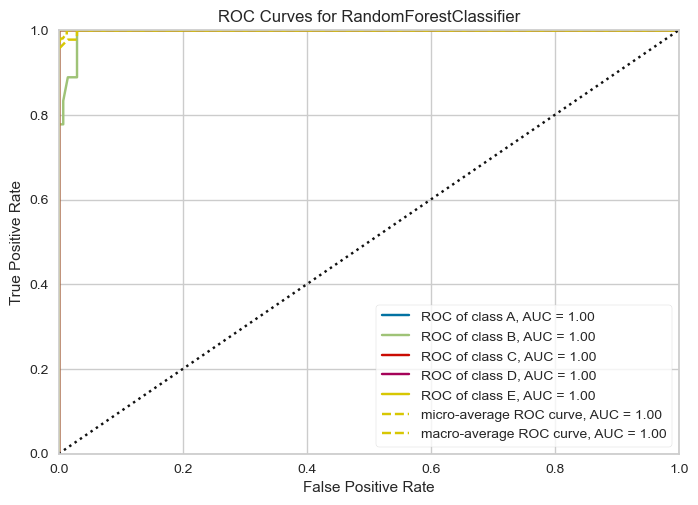

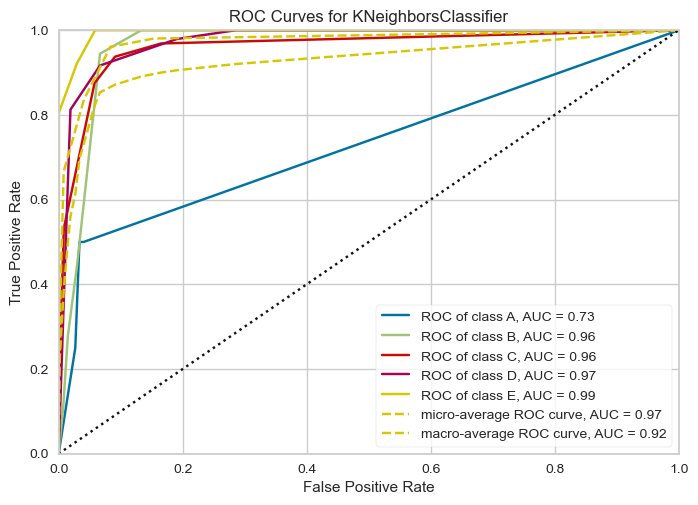

RESULTS FOR DF5 -- TOP 5 CORRELATED 



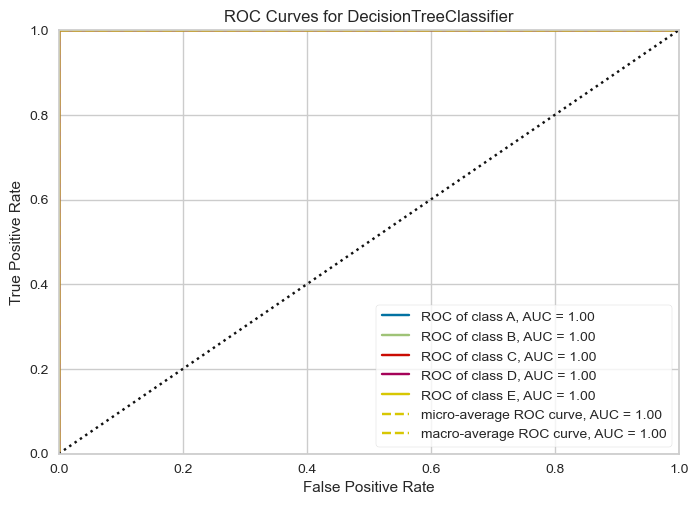

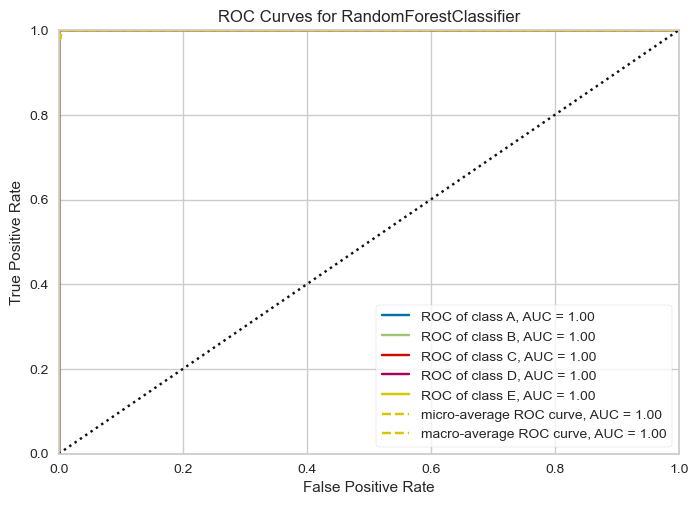

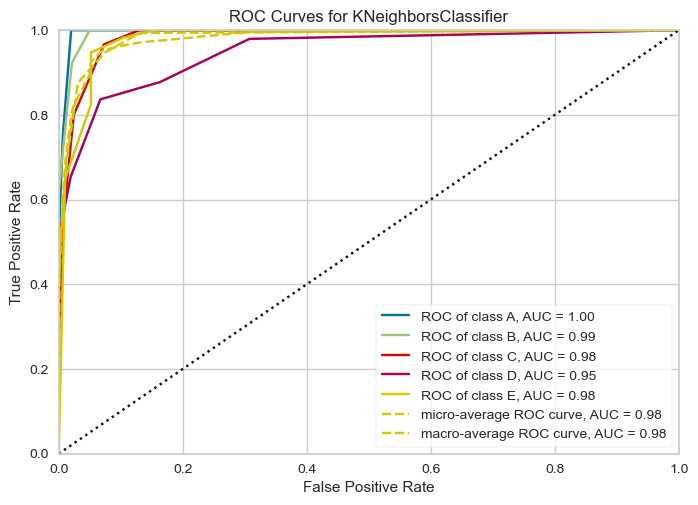

RESULTS FOR DF10 -- TOP 10 CORRELATED 



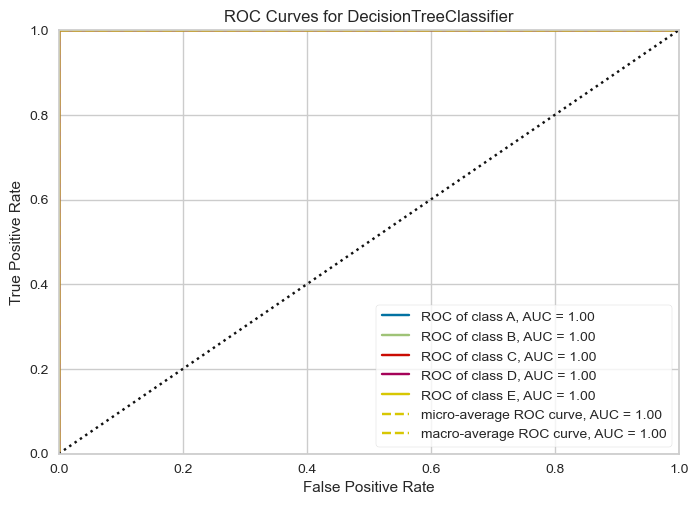

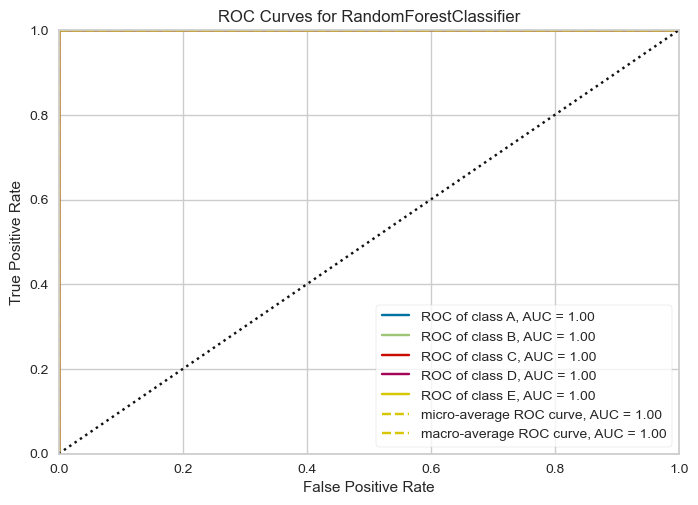

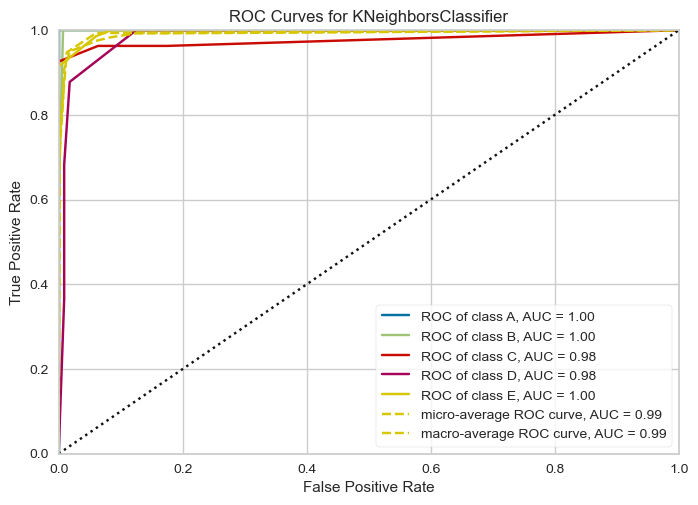

In [236]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)

##### Plotting an Overview/Comparison of Model Performance

In [237]:
# model1_accs = [df_acc[0], df2_acc[0], df5_acc[0], df10_acc[0]]
# model2_accs = [df_acc[1], df2_acc[1], df5_acc[1], df10_acc[1]]
# model3_accs = [df_acc[2], df2_acc[2], df5_acc[2], df10_acc[2]]

# plotdata = pd.DataFrame({
#     "Decision_Tree":model1_accs,
#     "Random_Forest":model2_accs,
#     "KNN":model3_accs
#     }, 
#     index=["df", "df2", "df5", "df10"]
# )
# plotdata.plot(kind="bar")
# plt.title("Test Accuracy of the Models on Different Datasets")
# plt.xlabel("Dataset")
# plt.ylabel("Test Accuracy")

In [238]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])
print(data4)

     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1       0.0  0.0   17      1.0       0.0            1.0        1        1   
2       0.0  0.0   15      1.0       1.0            1.0        1        1   
3       0.0  0.0   15      1.0       0.0            1.0        4        2   
4       0.0  0.0   16      1.0       0.0            1.0        3        3   
5       0.0  1.0   16      1.0       1.0            1.0        4        3   
..      ...  ...  ...      ...       ...            ...      ...      ...   
644     1.0  0.0   19      0.0       0.0            1.0        2        3   
645     1.0  0.0   18      1.0       1.0            1.0        3        1   
646     1.0  0.0   18      1.0       0.0            1.0        1        1   
647     1.0  1.0   17      1.0       1.0            1.0        3        1   
648     1.0  1.0   18      0.0       1.0            1.0        3        2   

     mom_job  dad_job  ...  outings  workday_alcohol  weekend_alcohol  heal

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

new_X = data4.drop(columns=['final_grade'])
new_Y = data4[['final_grade']]
# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)


# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
print(X_train)
print(X_train.columns)

Feature 0: 28.130454
Feature 1: 4.821933
Feature 2: 1.086222
Feature 3: 5.617557
Feature 4: 0.176428
Feature 5: 0.724157
Feature 6: 19.007099
Feature 7: 13.820006
Feature 8: 13.678420
Feature 9: 2.358283
Feature 10: 10.288338
Feature 11: 2.946059
Feature 12: 6.741433
Feature 13: 8.631785
Feature 14: 89.170750
Feature 15: 8.235345
Feature 16: 0.346529
Feature 17: 5.890371
Feature 18: 2.949054
Feature 19: 2.898113
Feature 20: 2.957630
Feature 21: 3.444271
Feature 22: 3.681353
Feature 23: 1.309417
Feature 24: 3.609393
Feature 25: 1.861978
Feature 26: 9.643252
Feature 27: 9.771878
Feature 28: 4.512790
Feature 29: 64.079066
Feature 30: 215.462568
Feature 31: 223.163587
Feature 32: 215.016219
Feature 33: 217.501832
     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
483     1.0  0.0   16      0.0       0.0            1.0        2        2   
337     0.0  0.0   17      1.0       0.0            1.0        4        3   
493     1.0  0.0   17      1.0       0.0          

Results for new df using Chi Classifier -- top3 correlated
     0  1  2
0    3  2  E
1    3  2  D
2    5  3  C
3    5  2  D
4    5  2  D
..  .. .. ..
606  5  3  E
607  1  2  B
608  5  2  E
609  2  1  E
610  5  1  E

[611 rows x 3 columns]


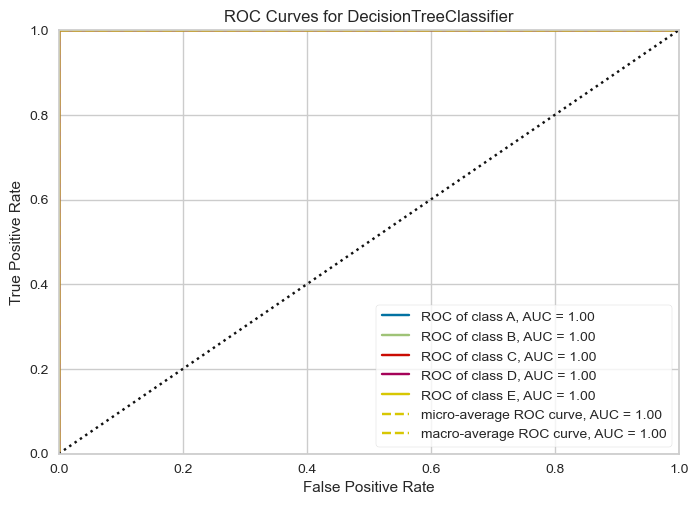

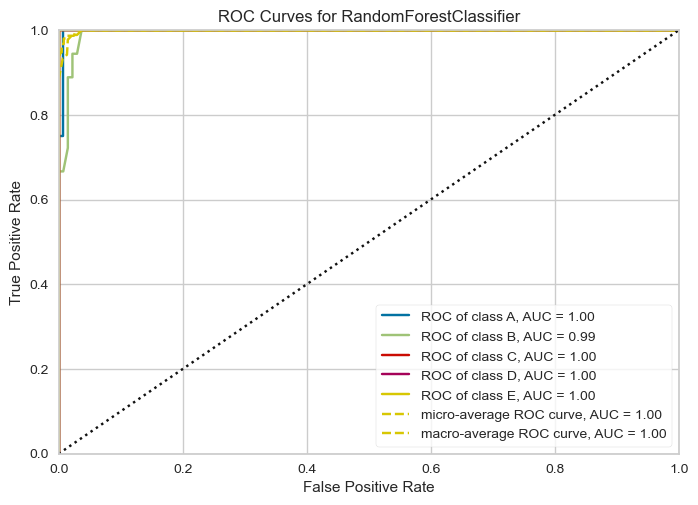

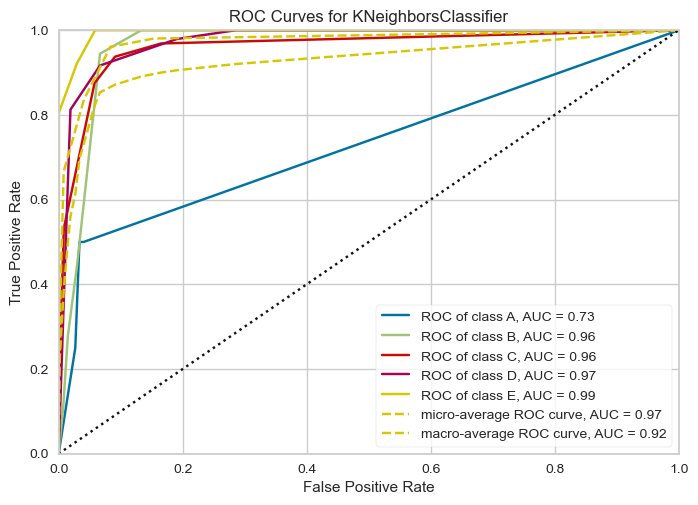

In [240]:
# CHI CLASSIFIER TOP FEATURES
print("Results for new df using Chi Classifier -- top3 correlated")
df2 = data4[['health','studytime','final_grade']]

binary_ordinal_columns = []

nominal_columns = []

numerical_columns = []

new_df = transformer(df2,numerical_columns, nominal_columns, binary_ordinal_columns)
print(new_df)

le = LabelEncoder()
new_df[0] = le.fit_transform(new_df[0])  

#seperate features from target column
X_df10 = new_df.drop(columns=[0])
Y_df10 = new_df[0]
X_df10, Y_df10

df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

## Evaluation using cross-validation

In [241]:
        
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# creating a function to run all the models at once and calculate accuracy, precision, recall and F1 score
def cross_validation_eval(new_X,new_Y):
    for model in models:
        print("%s\n"%model)
        scores = cross_val_score(model, new_X, new_Y, cv=10) # using the stratified ten-fold cross-validation method
        acc = scores.mean()
        print("Accuracy of %s is %s"%(model,acc))
        precision = cross_val_score(model, new_X, new_Y, scoring='precision_macro', cv=10)
        print("Precision of %s is %s"%(model,precision.mean()))
        recall = cross_val_score(model, new_X, new_Y, scoring='recall_macro', cv=10)
        print("Recall of %s is %s"%(model,recall.mean()))
        f1 = cross_val_score(model, new_X, new_Y, scoring='f1_macro', cv=10)
        print("F1 score of %s is %s\n"%(model,f1.mean()))

In [242]:
#1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)
# print(new_df)



#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47]) # data set with all the attributes except the target attribute
new_Y = new_df[47] # target attribute 



In [243]:
cross_validation_eval(new_X,new_Y)

DecisionTreeClassifier()

Accuracy of DecisionTreeClassifier() is 1.0
Precision of DecisionTreeClassifier() is 1.0
Recall of DecisionTreeClassifier() is 1.0
F1 score of DecisionTreeClassifier() is 1.0

RandomForestClassifier()

Accuracy of RandomForestClassifier() is 0.9918561607615018


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of RandomForestClassifier() is 0.9646969696969698
Recall of RandomForestClassifier() is 0.9593333333333334
F1 score of RandomForestClassifier() is 0.9573879453879452

KNeighborsClassifier()

Accuracy of KNeighborsClassifier() is 0.9083553675304072
Precision of KNeighborsClassifier() is 0.9215187708653281
Recall of KNeighborsClassifier() is 0.8910740359858007
F1 score of KNeighborsClassifier() is 0.8995264870152744



### Naive Bayes

In [244]:
# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB(alpha = 1.0, class_prior = None)
# model.fit(X, Y)

# print((MNBclf.predict(X[4:5])))

In [245]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB, CategoricalNB, GaussianNB
#Create an array of classifiers
models1 = []

modelA = MultinomialNB(alpha = 1.0)
models1.append(modelA)
modelB = ComplementNB(alpha = 1.0)
models1.append(modelB)
modelC = CategoricalNB(alpha = 1.0)
models1.append(modelC)
# modelD = GaussianNB()
# models1.append(modelD)

In [246]:
#train and test dataframe on the different models

def train_test_models1(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models1:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)
        
        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

        print('\n')
        print('\n')


    return accuracies  # a list of every models accuracy on the current dataset

Accuracy of MultinomialNB() is 0.5359477124183006
Micro Average Precision Score of the classifier MultinomialNB() is 0.5359477124183006
Macro Average Precision Score of the classifier MultinomialNB() is 0.33816184701116936
Micro Average Recall Score of the classifier MultinomialNB() is 0.5359477124183006
Macro Average Recall Score of the classifier MultinomialNB() is 0.31662907268170426
Micro Average F1 Score of the classifier MultinomialNB() is 0.5359477124183006
Macro Average F1 Score of the classifier MultinomialNB() is 0.31934459247689173
Confusion Matrix of MultinomialNB() is 
 [[ 0  0  1  1  0]
 [ 1  2  3  5  3]
 [ 0  3  4 11  1]
 [ 0  0 13 22 13]
 [ 0  1  1 14 54]]
True positive =  0
False positive =  0
False negative =  1
True negative =  2
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  0.6666666666666666


C:\Users\HP\AppData\Local\Temp\ipykernel_15704\1320737536.py:50: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


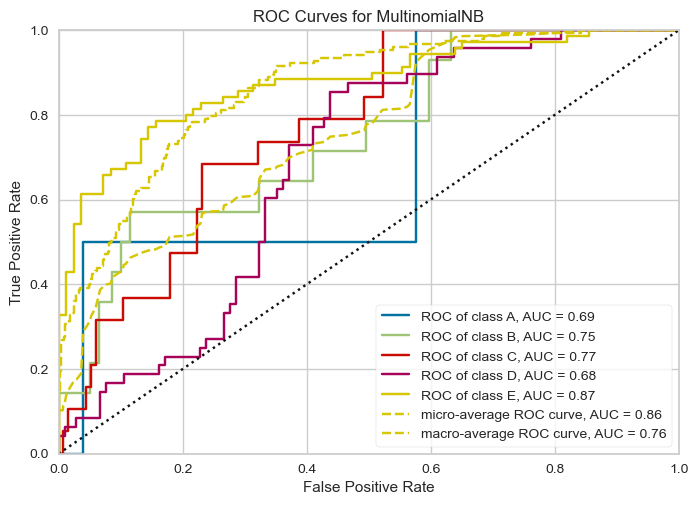





Accuracy of ComplementNB() is 0.48366013071895425
Micro Average Precision Score of the classifier ComplementNB() is 0.48366013071895425
Macro Average Precision Score of the classifier ComplementNB() is 0.29193410462776664
Micro Average Recall Score of the classifier ComplementNB() is 0.48366013071895425
Macro Average Recall Score of the classifier ComplementNB() is 0.2997744360902256
Micro Average F1 Score of the classifier ComplementNB() is 0.48366013071895425
Macro Average F1 Score of the classifier ComplementNB() is 0.29161781128224434
Confusion Matrix of ComplementNB() is 
 [[ 0  0  2  0  0]
 [ 0  3  7  0  4]
 [ 0  3  5 10  1]
 [ 0  7 17 12 12]
 [ 0  2  1 13 54]]
True positive =  0
False positive =  0
False negative =  0
True negative =  3
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  1.0


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Temp\ipykernel_15704\1320737536.py:50: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


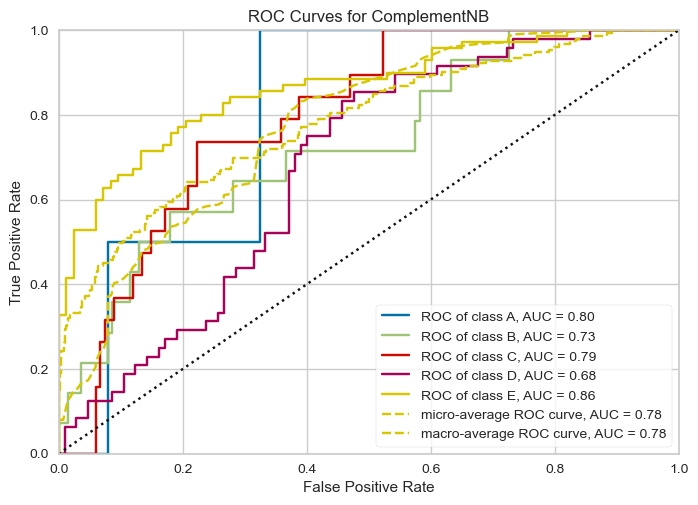





Accuracy of CategoricalNB() is 0.5032679738562091
Micro Average Precision Score of the classifier CategoricalNB() is 0.5032679738562091
Macro Average Precision Score of the classifier CategoricalNB() is 0.3196414950419527
Micro Average Recall Score of the classifier CategoricalNB() is 0.5032679738562091
Macro Average Recall Score of the classifier CategoricalNB() is 0.3212719298245614
Micro Average F1 Score of the classifier CategoricalNB() is 0.5032679738562091
Macro Average F1 Score of the classifier CategoricalNB() is 0.3201745524073462
Confusion Matrix of CategoricalNB() is 
 [[ 0  1  0  1  0]
 [ 1  4  3  2  4]
 [ 0  3  4 10  2]
 [ 1  6  9 19 13]
 [ 1  2  3 14 50]]
True positive =  0
False positive =  1
False negative =  1
True negative =  4
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  0.8


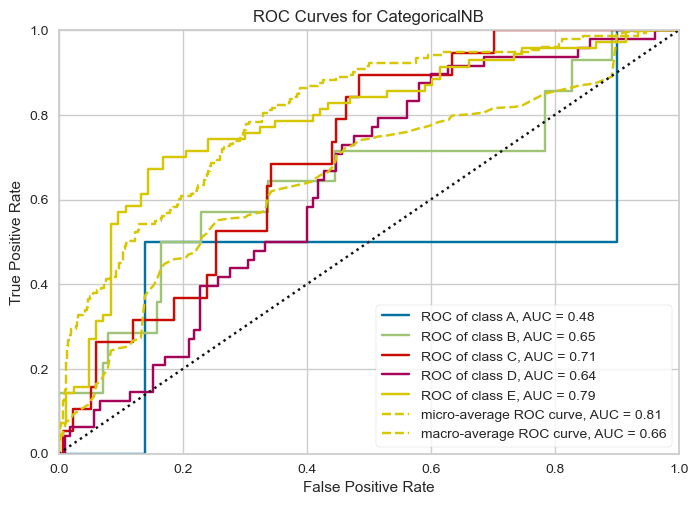

In [247]:
from sklearn.preprocessing import MinMaxScaler

df = data4

#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

 

#seperate features from target column
X_d = new_df.drop(columns=[47])
Y_d = new_df[47]

 

X_train, X_test, Y_train, Y_test = train_test_split(X_d, Y_d, test_size=0.25)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_acc = train_test_models1(X_train, Y_train, X_test, Y_test)

Accuracy of MultinomialNB() is 0.5851528384279476
Micro Average Precision Score of the classifier MultinomialNB() is 0.5851528384279476
Macro Average Precision Score of the classifier MultinomialNB() is 0.6205949126061908
Micro Average Recall Score of the classifier MultinomialNB() is 0.5851528384279476
Macro Average Recall Score of the classifier MultinomialNB() is 0.4155849598749352
Micro Average F1 Score of the classifier MultinomialNB() is 0.5851528384279476
Macro Average F1 Score of the classifier MultinomialNB() is 0.43678684809982526
Confusion Matrix of MultinomialNB() is 
 [[  2   2   5   6   2]
 [  0   9  16  11   3]
 [  0   5  30  33  19]
 [  0   1   9  69  42]
 [  0   2   6  28 158]]
True positive =  2
False positive =  2
False negative =  0
True negative =  9
Sensitivity Score of the classifier is:  0.5
Specificity Score of the classifier is:  1.0


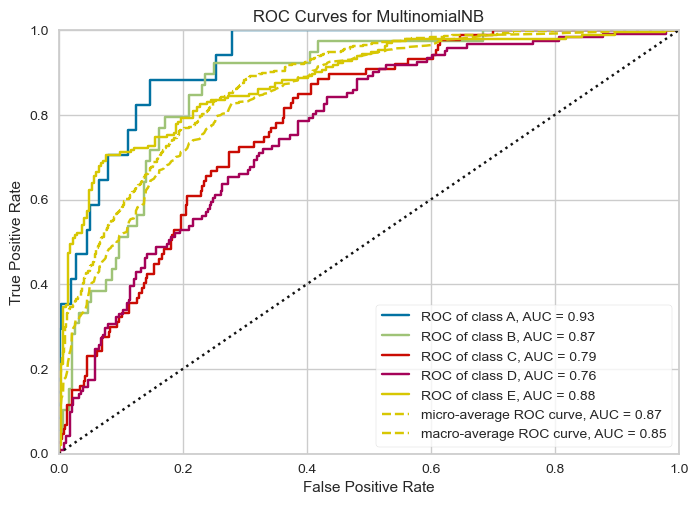





Accuracy of ComplementNB() is 0.5633187772925764
Micro Average Precision Score of the classifier ComplementNB() is 0.5633187772925764
Macro Average Precision Score of the classifier ComplementNB() is 0.38856747141688863
Micro Average Recall Score of the classifier ComplementNB() is 0.5633187772925764
Macro Average Recall Score of the classifier ComplementNB() is 0.4014115811258946
Micro Average F1 Score of the classifier ComplementNB() is 0.5633187772925764
Macro Average F1 Score of the classifier ComplementNB() is 0.39115460080200104
Confusion Matrix of ComplementNB() is 
 [[  0   4   8   3   2]
 [  0  12  19   5   3]
 [  1  12  44  12  18]
 [  1   9  22  49  40]
 [  0   7  14  20 153]]
True positive =  0
False positive =  4
False negative =  0
True negative =  12
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


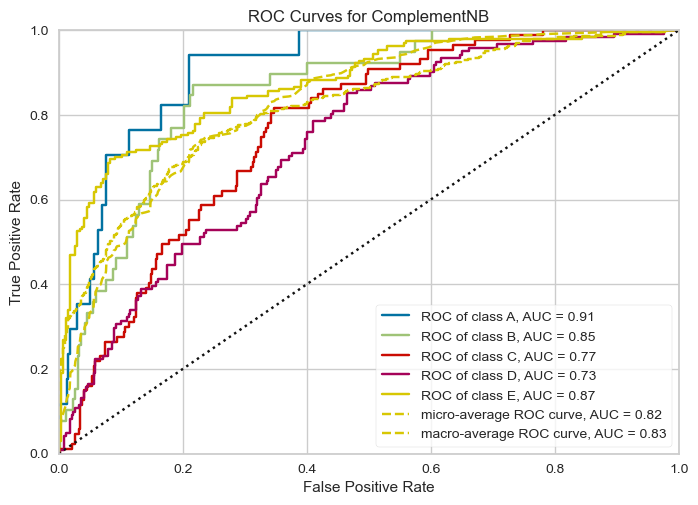





Accuracy of CategoricalNB() is 0.5065502183406113
Micro Average Precision Score of the classifier CategoricalNB() is 0.5065502183406113
Macro Average Precision Score of the classifier CategoricalNB() is 0.4898109298109298
Micro Average Recall Score of the classifier CategoricalNB() is 0.5065502183406113
Macro Average Recall Score of the classifier CategoricalNB() is 0.4173114794093406
Micro Average F1 Score of the classifier CategoricalNB() is 0.5065502183406113
Macro Average F1 Score of the classifier CategoricalNB() is 0.4345579659068071
Confusion Matrix of CategoricalNB() is 
 [[  6   1   3   3   4]
 [  0  12  10  10   7]
 [  1  13  21  25  27]
 [  1  13   8  61  38]
 [  0  13  13  36 132]]
True positive =  6
False positive =  1
False negative =  0
True negative =  12
Sensitivity Score of the classifier is:  0.8571428571428571
Specificity Score of the classifier is:  1.0


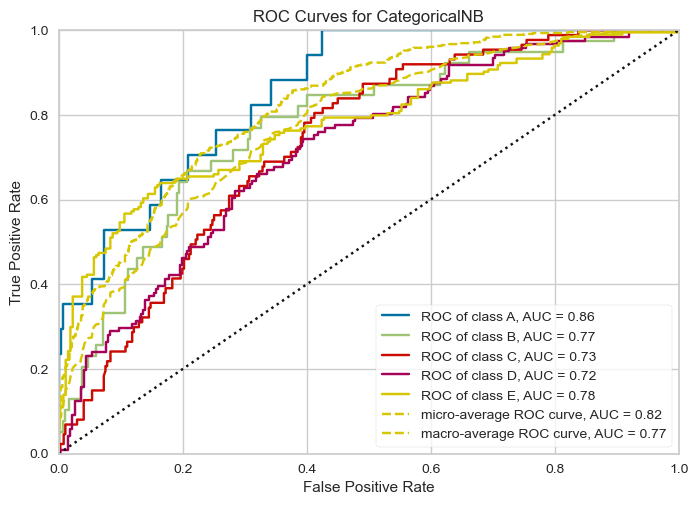

In [248]:
train_acc = train_test_models1(X_train, Y_train, X_train, Y_train)

### K means

In [249]:
y = np.array(Y_train)
y_t = np.array(Y_test)

In [250]:
from sklearn.cluster import KMeans 

In [251]:
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X_train)
X_t = scaler.fit_transform(X_test)
# kmeans.fit(X_s)
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=30, random_state=None)
kmeans.fit(X_s)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=5, n_init=30)

In [252]:
# correct = 0
# for i in range(len(X_t)):
#     X_array = np.array(X_t[i].astype(float))
#     X_array = X_array.reshape(-1, len(X_array))
#     prediction = kmeans.predict(X_array)
#     if prediction[0] == y_t[i]:
#         correct += 1

# print(correct/len(X_t)) # accuracy

In [253]:
y_pred = kmeans.fit_predict(X_t)
y

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 4, 1, 3, 1, 2, 2, 4, 1, 2, 4, 1, 3, 4, 3, 3, 4, 3, 4, 4, 3,
       4, 2, 1, 3, 4, 4, 3, 0, 3, 4, 4, 2, 3, 4, 4, 4, 3, 3, 3, 4, 1, 4,
       2, 4, 2, 1, 0, 4, 2, 4, 1, 4, 4, 1, 4, 4, 3, 4, 4, 1, 4, 2, 4, 4,
       4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 0, 1, 0, 3, 3, 4, 2, 2, 3, 2, 2,
       4, 4, 4, 1, 2, 4, 2, 3, 2, 3, 1, 4, 4, 4, 3, 4, 3, 4, 2, 4, 2, 4,
       3, 4, 4, 2, 3, 0, 4, 4, 3, 3, 3, 1, 1, 4, 1, 4, 2, 3, 3, 1, 4, 3,
       2, 4, 3, 4, 2, 2, 4, 1, 4, 3, 2, 3, 4, 0, 3, 4, 3, 3, 3, 4, 2, 4,
       4, 0, 1, 4, 4, 2, 4, 4, 4, 4, 3, 3, 0, 4, 4, 4, 3, 4, 3, 3, 2, 4,
       4, 2, 2, 4, 4, 4, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 4, 3, 4, 2, 3, 4,
       3, 3, 4, 3, 2, 4, 3, 4, 4, 1, 3, 4, 4, 2, 4, 4, 3, 4, 2, 1, 0, 2,
       2, 2, 2, 3, 3, 2, 4, 3, 3, 0, 4, 2, 3, 4, 2, 4, 2, 3, 2, 4, 4, 1,
       3, 2, 4, 4, 4, 3, 1, 2, 3, 4, 4, 4, 2, 4, 2, 2, 3, 2, 4, 4, 4, 1,
       2, 1, 4, 2, 2, 3, 3, 0, 2, 4, 2, 3, 2, 3, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 4, 0, 4, 4, 1, 4, 3, 4, 1, 4, 2, 4,

In [254]:
l = kmeans.labels_
l

array([2, 1, 0, 0, 4, 0, 0, 3, 1, 0, 1, 4, 1, 4, 3, 1, 0, 0, 4, 3, 0, 1,
       0, 0, 1, 2, 2, 4, 4, 2, 3, 3, 2, 3, 3, 3, 0, 2, 4, 4, 1, 2, 3, 4,
       3, 1, 1, 1, 3, 4, 1, 2, 2, 2, 1, 2, 0, 3, 2, 1, 4, 2, 4, 1, 1, 4,
       4, 3, 4, 4, 3, 0, 2, 1, 0, 2, 4, 4, 4, 0, 4, 3, 2, 4, 0, 3, 3, 1,
       4, 0, 3, 4, 1, 2, 0, 3, 4, 1, 2, 0, 3, 4, 1, 3, 2, 1, 2, 3, 0, 4,
       1, 0, 4, 4, 3, 3, 1, 2, 1, 2, 4, 3, 4, 2, 1, 1, 3, 4, 1, 2, 1, 3,
       3, 1, 3, 0, 4, 4, 2, 4, 1, 4, 2, 0, 3, 0, 2, 4, 4, 4, 0, 1, 1])

In [255]:
y_t

array([4, 4, 4, 4, 4, 4, 4, 3, 0, 4, 4, 3, 3, 0, 4, 2, 4, 4, 4, 3, 1, 3,
       4, 4, 4, 3, 4, 2, 3, 4, 3, 1, 3, 3, 2, 2, 4, 4, 3, 3, 4, 4, 3, 1,
       3, 4, 3, 2, 3, 1, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 2, 4, 2, 4, 1, 4,
       3, 3, 2, 2, 2, 4, 4, 2, 4, 4, 4, 3, 1, 4, 3, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 3, 4, 3, 4, 1, 4, 3, 1, 3, 4, 3, 1, 1, 4, 4, 2, 4, 3, 4, 2,
       4, 4, 3, 2, 3, 4, 4, 4, 3, 3, 3, 3, 1, 4, 3, 4, 2, 3, 1, 4, 4, 4,
       4, 4, 3, 1, 2, 2, 4, 2, 4, 1, 4, 3, 2, 4, 3, 4, 3, 3, 4, 3, 3])

In [256]:
# print(np.sum(l==y)/len(l))
acc = sklearn.metrics.accuracy_score(y_t,y_pred) 
print(acc)

0.17647058823529413


In [257]:
kmeans.cluster_centers_

array([[ 3.68000000e-01,  1.17142857e-01,  9.20000000e-01,
         4.16333634e-17,  4.00000000e-02,  4.00000000e-02,
        -4.16333634e-17,  8.00000000e-02,  2.08166817e-17,
         6.00000000e-01,  2.80000000e-01,  4.00000000e-02,
         6.80000000e-01,  1.60000000e-01,  8.00000000e-02,
         8.00000000e-02,  2.80000000e-01,  6.40000000e-01,
         8.00000000e-02,  6.40000000e-01,  3.20000000e-01,
         5.20000000e-01,  4.40000000e-01,  8.80000000e-01,
         1.20000000e-01,  7.20000000e-01,  8.00000000e-02,
         2.00000000e-01,  7.60000000e-01,  8.40000000e-01,
         5.20000000e-01,  6.80000000e-01,  3.40000000e-01,
         3.90000000e-01,  2.93333333e-01,  2.40000000e-01,
         9.33333333e-02,  8.20000000e-01,  5.10000000e-01,
         4.60000000e-01,  1.10000000e-01,  2.70000000e-01,
         5.80000000e-01,  3.24000000e-01,  4.03333333e-01,
         3.52727273e-01,  3.62424242e-01],
       [ 2.54545455e-01,  1.88311688e-01,  3.03030303e-02,
         9.09

### Gaussian Mixture Model

In [258]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_train)
labels = gmm.predict(X_train)
labels

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([4, 0, 0, 4, 1, 4, 4, 3, 3, 0, 4, 3, 2, 4, 0, 3, 4, 2, 4, 0, 2, 4,
       0, 3, 4, 2, 0, 1, 3, 4, 2, 0, 2, 2, 0, 1, 4, 4, 0, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 4, 4, 1, 4, 4, 1, 4, 3, 2, 3, 0, 4, 4, 2, 2, 0, 3,
       4, 3, 2, 4, 1, 4, 3, 3, 0, 3, 3, 1, 4, 4, 3, 0, 4, 3, 4, 4, 0, 3,
       3, 3, 4, 1, 0, 0, 2, 1, 2, 3, 3, 3, 4, 3, 3, 0, 2, 3, 4, 4, 3, 3,
       3, 0, 2, 4, 3, 3, 0, 4, 3, 1, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 0, 0, 2, 0, 1, 0, 3, 3, 4, 0, 1, 2, 1, 0, 0, 0, 3, 3, 3, 3, 2,
       3, 0, 4, 4, 0, 3, 3, 0, 3, 0, 1, 3, 0, 0, 2, 1, 3, 4, 0, 3, 2, 1,
       0, 4, 2, 0, 4, 0, 0, 2, 1, 4, 4, 0, 3, 4, 1, 1, 3, 4, 0, 1, 4, 4,
       4, 4, 4, 4, 2, 0, 1, 3, 0, 4, 4, 4, 0, 1, 4, 3, 3, 0, 2, 3, 3, 3,
       0, 3, 4, 0, 2, 2, 3, 3, 4, 1, 0, 3, 3, 0, 4, 2, 4, 3, 1, 0, 0, 3,
       3, 3, 3, 4, 4, 1, 4, 4, 0, 3, 2, 1, 3, 1, 4, 4, 1, 4, 1, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 4, 1, 3, 3, 1, 1, 4, 2, 2, 3, 0, 0, 4, 0, 2, 3,
       3, 0, 0, 1, 1, 3, 1, 4, 4, 2, 0, 4, 1, 3, 3,

In [259]:
gmm.converged_

True

In [260]:
gmm.n_iter_

6

In [261]:
l = gmm.predict(X_train) 

print(np.sum(l==y)/len(l))
acc = sklearn.metrics.accuracy_score(y,l)
print(acc)

0.22489082969432314
0.22489082969432314


In [262]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=l, s=40, cmap='viridis');

In [263]:
p = gmm.predict_proba(X_train)
p

array([[1.40049498e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.37476106e-42, 0.00000000e+00,
        1.75948282e-40],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.77319935e-31],
       ...,
       [8.83290356e-11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [1.46829743e-08, 0.00000000e+00, 1.37128670e-13, 0.00000000e+00,
        9.99999985e-01],
       [0.00000000e+00, 1.00000000e+00, 3.50049014e-20, 1.55182364e-31,
        0.00000000e+00]])

In [264]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

metrics.silhouette_score(X_train,l)

0.056601748113839744

## Hierarchical Clustering

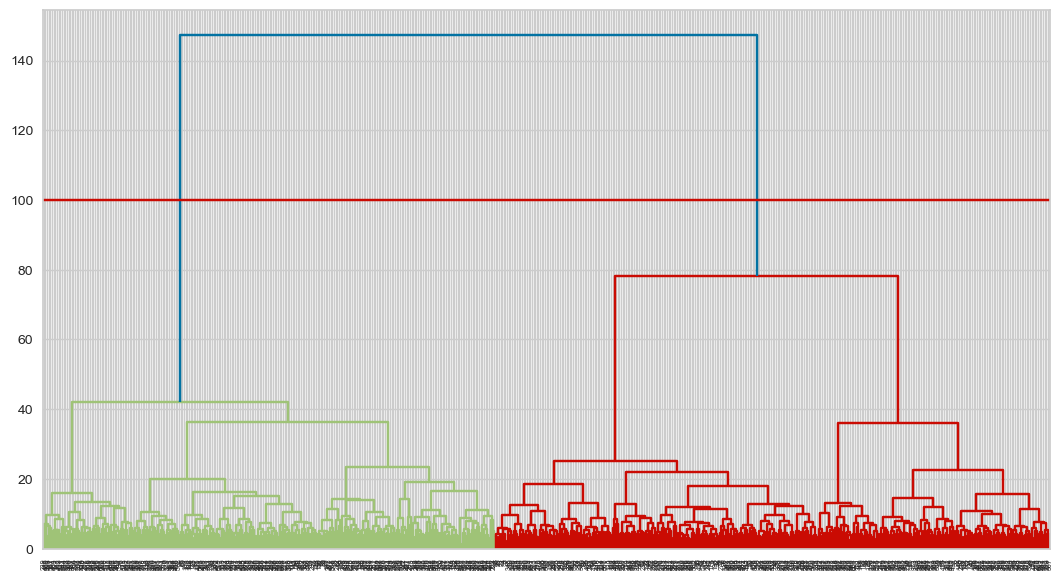

In [265]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


# data = list(zip(X_d, Y_d))

# linkage_data = linkage(data, method='ward', metric='euclidean')
# dendrogram(linkage_data)

# # The vertical line with maximum distance is the blue line, so the threshold is 70
# plt.axhline(y=70, color='b', linestyle='--')

# plt.show()

plt.figure(figsize=(13, 7))

clusters = shc.linkage(new_df, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)

# The vertical line with maximum distance is the blue line, so the threshold is 100

plt.axhline(y = 100, color = 'r', linestyle = '-')

In [266]:
# After locating the horizontal line, we count how many times our vertical lines were crossed by it - 2 times
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(new_df)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [267]:
# plt.figure(figsize=(7, 4))  
# plt.scatter(new_df[0], new_df[1], c=cluster.labels_, cmap='viridis') 

## Decision Trees

In [268]:
model = tree.DecisionTreeClassifier(max_depth=5, random_state=42) # spliting criteria is best to choose the best split
# all features are considered when looking for thr best split
# max depth of the tree is set to 5 after referring to previous run of this classifier
model.fit(X_train, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

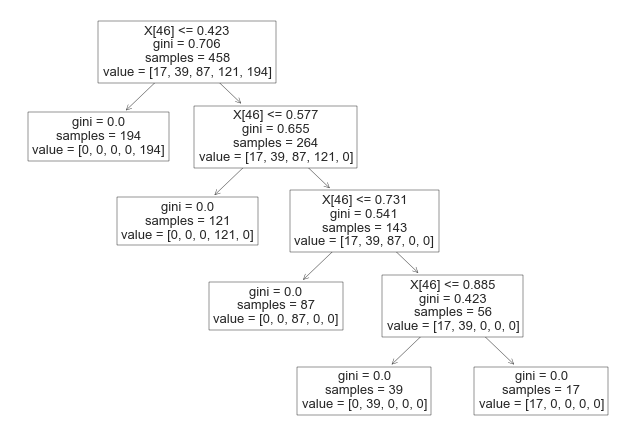

In [269]:
from sklearn.tree import plot_tree
plot_tree(model);

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [271]:
# define search space
params =  {
    'criterion':['gini','entropy'],
    'splitter' : ["best", "random"],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

# define search
search = GridSearchCV(model, params, scoring='accuracy', cv=10, verbose = 3)
# execute search
result = search.fit(X_train, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) # entropy scores are lower

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_

[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=random;, score=0.848 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 3

[CV 9/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.870 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.957 total time=   

[CV 9/10] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8

[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s

[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10]

[CV 4/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, min_samples_leaf=5, splitter=best;, score=1.000 total time=   

[CV 10/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.978 tot

[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[

[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random;, score=0.913 total time=   0.0s
[CV 2/1

[CV 6/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=9, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[

[CV 6/10] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random;, score=0.848 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   

[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random;, score=1.000 total time=  

[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=random;, score=0.957 total ti

[CV 1/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.978 to

[CV 1/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score

[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0

[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total t

[CV 8/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.957 total t

[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=random;, score

[CV 4/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0

[CV 9/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=random;, score=0.935 total

[CV 6/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random;, score=1.000 total time=

[CV 1/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, min_samples_leaf=3, splitter=random;, score=0.978 to

[CV 3/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=0.848 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=40, min_samples_leaf=9, splitter=best;, score=1.000 tot

[CV 6/10] END criterion=gini, max_depth=50, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=50, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=50, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=50, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=50, min_samples_leaf=3, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total tim

[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[

[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=3, splitter=random;, score=1.000 tot

[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=7, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0

[CV 7/10] END criterion=gini, max_depth=90, min_samples_leaf=2, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, min_samples_leaf=2, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=90, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=best;, score=1.000 total time=

[CV 6/10] END criterion=gini, max_depth=90, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=90, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, min_samples_leaf=7, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=90, min_samples_leaf=7, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total tim

[CV 3/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=5, splitter=best;, score=

[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.848 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=120, min_samples_leaf=10, splitter=best;, score=

[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=random;, score=0.978 total ti

[CV 2/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best;, score=1.000 t

[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.870 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.826 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.844 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=6, splitter=best

[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=random;, score=0.783 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=random;, score=0.822 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, s

[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.870 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;,

[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;

[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000

[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=0.891

[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=9, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=7, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=9, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;,

[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=6, splitter=best

[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, min_samples_leaf=1, splitter=best;, score=1

[CV 6/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, sco

[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=best;, sc

[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=random;, 

[CV 9/10] END criterion=entropy, max_depth=11, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, 

[CV 9/10] END criterion=entropy, max_depth=11, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, 

[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=ran

[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=8, splitter=b

[CV 3/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_leaf=3, splitter=random;, sc

[CV 5/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=random;, score=0.935 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, min_samples_leaf=8, splitter

[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter

[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=0.870 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=8, spli

[CV 5/10] END criterion=entropy, max_depth=30, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=30, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=30, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=30, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=30, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=30, min_samples_leaf=4, splitter

[CV 1/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.870 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, split

[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=40, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=5, splitter

[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=ra

[CV 9/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=best;, 

[CV 2/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=70, min_samples_leaf=1, splitter=best;, scor

[CV 8/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=70, min_samples_leaf=6, splitter=r

[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, scor

[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=random;, 

[CV 1/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=

[CV 6/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=120, min_samples_leaf=5, split

[CV 1/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=150, min_samples_leaf=1, splitter=bes

[CV 7/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, spl

In [185]:
search = RandomizedSearchCV(model, params, random_state=42, cv=10, verbose=3,scoring='accuracy') # iterations are 10
result = search.fit(X_train, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=1

[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.3) # 70% training and 30% test

# Experimenting with train-test split using the best hyperparameters found from GridSearchCV
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  1.0


In [296]:
# Experimenting with train-test split using the best hyperparameters found from RandomizedSearchCV
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 150, min_samples_leaf = 1, splitter = "best")

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train) 

# Model Accuracy
print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [297]:
# moving 30% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.6) # 40% training and 60% test

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train) 

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [299]:
# moving 60% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.9) # 10% training and 90% test

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train) 

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  0.9654545454545455


### Random Forests

In [305]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train) 

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  0.8690909090909091


In [306]:
# moving 30% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.6) # 40% training and 60% test

rfc = RandomForestClassifier()
rfc = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_train_pred = rfc.predict(X_train) 

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [307]:
# moving 60% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.9) # 10% training and 90% test

rfc = RandomForestClassifier()
rfc = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_train_pred = rfc.predict(X_train) 

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  0.9763636363636363
